In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

We have CPS Progress Reports data for year 2022. [now 2018] 
https://data.cityofchicago.org/Education/Chicago-Public-Schools-School-Progress-Reports-SY2/2dn2-x66j/about_data
The goal here is to harness data science methods, especially regression to understand the health of a school. The steps here will be:

* understand what data we have and what it means
  * is there one metric here we can use to signal overall health?
  * do we have to look through different lenses when it comes to ES, MS, HS
  * may need to look to outside for metadata
* decide on a target variable/formulate a question we want to answer
* bring in neighborhood data and demographic data from geospatial dataset to understand if place affects schools
* Clean the data
* Explore the data
* decide whether to augment the dataset with progress reports from prior years (if so, repeat clean and explore)
* Modeling
* Evaluation
* Insights

Notes:
After looking through data, realized that a lot of the attainment and test scores data was missing. This dataset won't be useful for our purpose. However some older datasets seam to have the data, so will use them.
2018
2017
2016

In [10]:
dat = pd.read_csv("Chicago_Public_Schools_-_School_Progress_Reports_SY1819_20241101.csv")

In [11]:
pd.set_option('display.max_columns', None)
dat.head(3)

School_ID Short_Name                                    Long_Name  \
0     609710  HARLAN HS  John M Harlan Community Academy High School   
1     610059      MAYER                    Oscar Mayer Magnet School   
2     610334    RABY HS                          Al Raby High School   

    School_Type Primary_Category              Address     City     State  \
0  Neighborhood               HS  9652 S MICHIGAN AVE  Chicago  Illinois   
1        Magnet               ES   2250 N CLIFTON AVE  Chicago  Illinois   
2         Small               HS   3545 W FULTON BLVD  Chicago  Illinois   

     Zip         Phone           Fax  \
0  60628  7.735355e+09  7.735355e+09   
1  60614  7.735346e+09  7.735346e+09   
2  60624  7.735347e+09  7.735347e+09   

                                  CPS_School_Profile  \
0  http://cps.edu/Schools/Pages/school.aspx?Schoo...   
1  http://cps.edu/Schools/Pages/school.aspx?Schoo...   
2  http://cps.edu/Schools/Pages/school.aspx?Schoo...   

                         Website  Progress_Report_Year  \
0  https://www.harlanfalcons.org                  2018   
1        http://mayermagnet.org/                  2018   
2         http://www.alraby.org/                  2018   

   Blue_Ribbon_Award_Year  Excelerate_Award_Gold_Year  Spot_Light_Award_Year  \
0                     NaN                         NaN                    NaN   
1                     NaN                         NaN                    NaN   
2                     NaN                         NaN                    NaN   

   Improvement_Award_Year  Excellence_Award_Year Student_Growth_Rating  \
0                     NaN                    NaN         BELOW AVERAGE   
1                  2013.0                    NaN               AVERAGE   
2                     NaN                    NaN         BELOW AVERAGE   

                          Student_Growth_Description  \
0  Student Growth measures the change in standard...   
1  Student Growth measures the change in standard...   
2  Student Growth measures the change in standard...   

   Growth_Reading_Grades_Tested_Pct_ES Growth_Reading_Grades_Tested_Label_ES  \
0                                  NaN                                   NaN   
1                                 58.0                                  58th   
2                                  NaN                                   NaN   

   Growth_Math_Grades_Tested_Pct_ES Growth_Math_Grades_Tested_Label_ES  \
0                               NaN                                NaN   
1                              47.0                               47th   
2                               NaN                                NaN   

  Student_Attainment_Rating  \
0    FAR BELOW EXPECTATIONS   
1         FAR ABOVE AVERAGE   
2    FAR BELOW EXPECTATIONS   

                      Student_Attainment_Description  \
0  Student Attainment measures how well the schoo...   
1  Student Attainment measures how well the schoo...   
2  Student Attainment measures how well the schoo...   

   Attainment_Reading_Pct_ES Attainment_Reading_Lbl_ES  \
0                        NaN                       NaN   
1                       96.0                      96th   
2                        NaN                       NaN   

   Attainment_Math_Pct_ES Attainment_Math_Lbl_ES Culture_Climate_Rating  \
0                     NaN                    NaN    PARTIALLY ORGANIZED   
1                    91.0                   91st         WELL ORGANIZED   
2                     NaN                    NaN         WELL ORGANIZED   

                         Culture_Climate_Description  \
0  Results are based on student and teacher respo...   
1  Results are based on student and teacher respo...   
2  Results are based on student and teacher respo...   

   School_Survey_Student_Response_Rate_Pct  \
0                                     76.6   
1                                     98.9   
2                                     74.1   

   School_Survey_Student_Response_R

In [12]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# <font color='blue'>Setting up Census Data</font>

In [13]:
# Dataset:  2021 American Community Survey: 5-Year Data [2017-2021, Block Groups & Larger Areas]
data_path = "~/Documents/Data_Science_Projects/Chicago_Tool/Data/"
census_df = pd.read_csv(data_path + "nhgis0012_csv/nhgis0012_ds254_20215_blck_grp.csv")
census_df.head(3)


GISJOIN       YEAR STUSAB  REGIONA  DIVISIONA     STATE  STATEA  \
0  G17000100001001  2017-2021     IL      NaN        NaN  Illinois      17   
1  G17000100001002  2017-2021     IL      NaN        NaN  Illinois      17   
2  G17000100001003  2017-2021     IL      NaN        NaN  Illinois      17   

         COUNTY  COUNTYA  COUSUBA  PLACEA  TRACTA  BLKGRPA  CONCITA  AIANHHA  \
0  Adams County        1      NaN     NaN     100        1      NaN      NaN   
1  Adams County        1      NaN     NaN     100        2      NaN      NaN   
2  Adams County        1      NaN     NaN     100        3      NaN      NaN   

   RES_ONLYA  TRUSTA  AIHHTLI  AITSA  ANRCA  CBSAA  CSAA  METDIVA  NECTAA  \
0        NaN     NaN      NaN    NaN    NaN    NaN   NaN      NaN     NaN   
1        NaN     NaN      NaN    NaN    NaN    NaN   NaN      NaN     NaN   
2        NaN     NaN      NaN    NaN    NaN    NaN   NaN      NaN     NaN   

   CNECTAA  NECTADIVA  UAA  CDCURRA  SLDUA  SLDLA  ZCTA5A  SUBMCDA  SDELMA  \
0      NaN        NaN  NaN      NaN    NaN    NaN     NaN      NaN     NaN   
1      NaN        NaN  NaN      NaN    NaN    NaN     NaN      NaN     NaN   
2      NaN        NaN  NaN      NaN    NaN    NaN     NaN      NaN     NaN   

   SDSECA  SDUNIA  PCI  PUMAA                 GEO_ID  BTTRA  BTBGA  \
0     NaN     NaN  NaN    NaN  1500000US170010001001    NaN    NaN   
1     NaN     NaN  NaN    NaN  1500000US170010001002    NaN    NaN   
2     NaN     NaN  NaN    NaN  1500000US170010001003    NaN    NaN   

      TL_GEO_ID                                                 NAME_E  \
0  170010001001  Block Group 1, Census Tract 1, Adams County, Illinois   
1  170010001002  Block Group 2, Census Tract 1, Adams County, Illinois   
2  170010001003  Block Group 3, Census Tract 1, Adams County, Illinois   

   AON5E001  AON5E002  AON5E003  AON5E004  AON5E005  AON5E006  AON5E007  \
0      1236       993       186         0        57         0         0   
1       663       649         7         0         7         0         0   
2       643       579        64         0         0         0         0   

   AON5E008  AON5E009  AON5E010  AOOCE001  AOOCE002  AOOCE003  AOOCE004  \
0         0         0         0      1236      1236       993       186   
1         0         0         0       663       663       649         7   
2         0         0         0       643       643       579        64   

   AOOCE005  AOOCE006  AOOCE007  AOOCE008  AOOCE009  AOOCE010  AOOCE011  \
0         0        57         0         0         0         0         0   
1         0         7         0         0         0         0         0   
2         0         0         0         0         0         0         0   

   AOOCE012  AOOCE013  AOOCE014  AOOCE015  AOOCE016  AOOCE017  AOOCE018  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   

   AOOCE019  AOOCE020  AOOCE021  AOP8E001  AOP8E002  AOP8E003  AOP8E004  \
0         0         0         0       956         0         0         0   
1         0         0         0       429         0         0         0   
2         0         0         0       494        20         0         0   

   AOP8E005  AOP8E006  AOP8E007  AOP8E008  AOP8E009  AOP8E010  AOP8E011  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   

   AOP8E012  AOP8E013  AOP8E014  AOP8E015  AOP8E016  AOP8E017  AOP8E018  \
0         0         0        78        57         0       248        19   
1         0         0         0         7         0       184        46   
2         0        22        32         0         0        59        25   

   AOP8E019  AOP8E020  AOP8E021  AOP8E022  AOP8E023  AOP8E024  AOP8E02

In [14]:
# Census dictionary for column names 

census_dic = {"AON5E001":"pop_total", "AON5E002":"pop_white", "AON5E003":"pop_black", "AON5E005":"pop_asian", "AON5E007":"pop_other",
 "AON5E008":"pop_mixed",
              "AOOCE001":"hisp_total", "AOOCE012": "is_hispanic",
 "AOP8E001": "edu_total", "AOP8E017":"edu_hsgrad", "AOP8E022":"edu_bachelor",
 "AOQIE001": "income_medhh",
 "AOSJE001": "emp_total", "AOSJE002":"emp_inLF", "AOSJE004":"emp_employed", "AOSJE005":"emp_unemployed","AOSJE006":"emp_army"
}

In [15]:
census_df.rename(columns=census_dic, inplace = True)

census_df=census_df[["COUNTY","TRACTA", "BLKGRPA",
           "pop_total", "pop_white", "pop_black","hisp_total", "is_hispanic", "pop_asian",
           "income_medhh"
          ]]

census_df = census_df[census_df["COUNTY"] == "Cook County"]
len(census_df)

4002

In [16]:
# to sync formatting with blkGrp sf, TRACTA & BLKGPA need to be strings and TRACTA needs 6 characters. Add 0 in front

census_df["TRACTA"] = census_df["TRACTA"].astype(str)
census_df["BLKGRPA"] = census_df["BLKGRPA"].astype(str)

trct_lst=[]
for i in census_df["TRACTA"]:
    if len(i) < 6:
        correction = (6-len(i)) * "0"
        new_tract = correction + i
    else:
        new_tract = i
    trct_lst.append(new_tract)
    
census_df["TRACTA"] =trct_lst

In [17]:
# Since there are no incomes of 0 in the data, replace the na's with 0 for now
census_df.loc[census_df["income_medhh"].isna(), "income_medhh"] = 0


In [18]:
def to_perc_fun(df, total, group, new_var_name):
    """group is the group column name,
       new_var_name is name of new column after calc"""
    df[new_var_name] = df[group]/df[total]


In [19]:
to_perc_fun(census_df, "pop_total", "pop_white", "perc_white")
to_perc_fun(census_df, "pop_total", "pop_black", "perc_black")
to_perc_fun(census_df, "pop_total", "is_hispanic", "perc_hispanic")
to_perc_fun(census_df, "pop_total", "pop_asian", "perc_asian")


In [20]:
high_level_vars = ["perc_white", "perc_black","perc_hispanic","perc_asian", "income_medhh"]

### Maps

In [2]:
#!pip install geopandas
#!pip install --upgrade geopandas fiona

In [1]:
import geopandas as gpd
from shapely.geometry import Point

In [3]:
# shape file for Chi community areas
cmnty_sf = gpd.read_file("/Users/laurenshores/Documents/Data_Science_Projects/Exploring_Chicago_Neighborhoods/Data/Boundaries_Community_Areas/geo_export_782a78c7-402d-4a93-bb37-c4ab05c3b15b.shp")


/opt/anaconda3/envs/ls_geo_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/ls_geo_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until


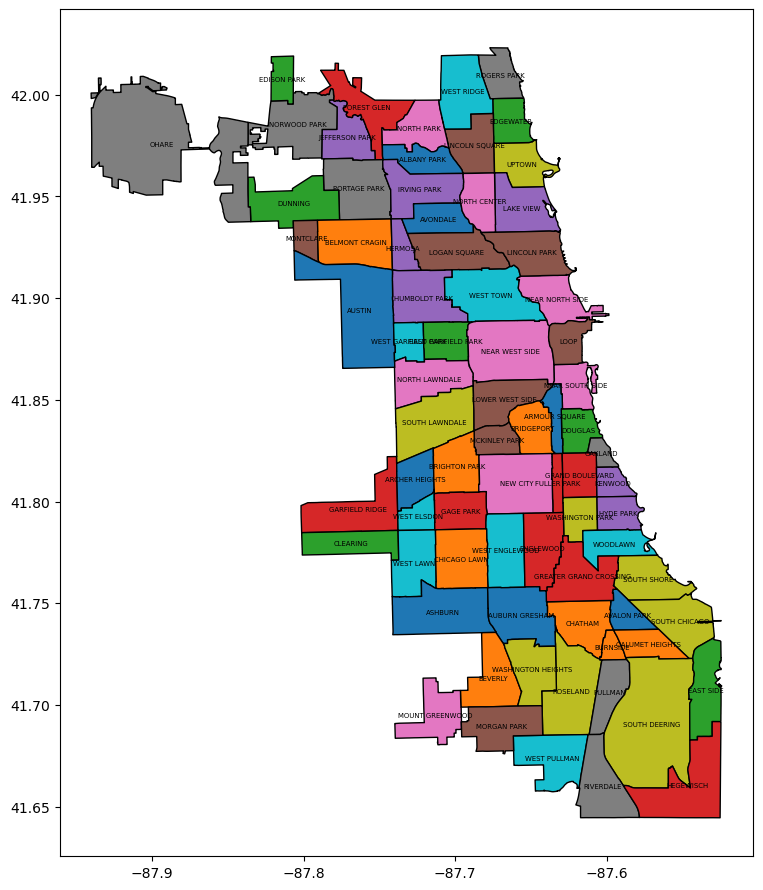

In [4]:
ax = cmnty_sf.plot(column='community', figsize=[18,11], edgecolor='black')

for x, y, label in zip(cmnty_sf.geometry.centroid.x, cmnty_sf.geometry.centroid.y, cmnty_sf['community']):
    ax.text(x, y, label, fontsize=5, ha='center', va='center')

In [64]:
blkGrp_sf = gpd.read_file("/Users/laurenshores/Documents/Data_Science_Projects/Exploring_Chicago_Neighborhoods/Data/tigerLine_2019_IL_bg/tl_2019_17_bg.shp") 

# cook county is countypf 31
blkGrp_sf = blkGrp_sf[blkGrp_sf["COUNTYFP"] == "031"].reset_index()


In [65]:
"""This shapefile contains a bunch of water in lake michigan that makes the plot awkward. 
 filter out the the largest water area """
max_water_area = blkGrp_sf["AWATER"].max()
blkGrp_sf = blkGrp_sf[blkGrp_sf["AWATER"]!= max_water_area]


In [66]:
blkGrp_sf = blkGrp_sf[['TRACTCE', 'BLKGRPCE', 'geometry']]

blkGrp_sf['blkgrp_geom'] = blkGrp_sf['geometry']
cmnty_sf['cmnty_geom'] = cmnty_sf['geometry']

blkGrp_sf.columns

Index(['TRACTCE', 'BLKGRPCE', 'geometry', 'blkgrp_geom'], dtype='object')

In [67]:
cmnty_sf = cmnty_sf[["community","geometry","cmnty_geom"]]
print(cmnty_sf.dtypes)
print(blkGrp_sf.dtypes)

community       object
geometry      geometry
cmnty_geom    geometry
dtype: object
TRACTCE          object
BLKGRPCE         object
geometry       geometry
blkgrp_geom    geometry
dtype: object


1660
Community Records:  77
Block Group Records:  3992
Community with Block Group Records:  3584


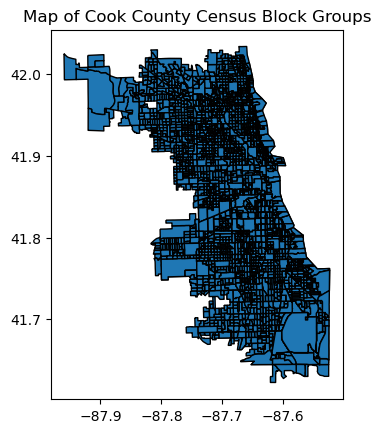

In [108]:
# Use a spatial join to add community area info to blockgroup data

blkGrp_sf.crs = cmnty_sf.crs

z = gpd.sjoin( blkGrp_sf, cmnty_sf,  how="left", op="intersects").reset_index(drop=True) 

z = z.drop_duplicates()
print(len(z[z["community"].isna()]))

z= z[~z.community.isna()]
z.plot( edgecolor='black')
plt.title("Map of Cook County Census Block Groups")
print("Community Records: ", len(cmnty_sf))
print("Block Group Records: ", len( blkGrp_sf))
print("Community with Block Group Records: ", len(z))

In [109]:
# Join blkgrp + community data with census data
df = pd.merge(z, census_df, how="left", left_on=["TRACTCE", "BLKGRPCE"],
         right_on = ["TRACTA", "BLKGRPA"]
        )

df.drop(columns =["index_right"], inplace=True)

In [110]:
df = df[['geometry', 'blkgrp_geom', 'cmnty_geom', 'community', 'pop_total',
       'perc_white', 'perc_black', 'perc_hispanic', 'perc_asian', 'income_medhh']]

In [111]:
df.head(3)

geometry  \
0  POLYGON ((-87.76799 41.86555, -87.76774 41.86555, -87.76700 41.86556, -87.76676 41.86556, -87.76651 41.86557, -87.76578 41.86557, -87.76553 41.86558, -87.76529 41.86558, -87.76457 41.86559, -87.76455 41.86559, -87.76431 41.86560, -87.76408 41.86561, -87.76399 41.86561, -87.76341 41.86562, -87.76318 41.86562, -87.76293 41.86563, -87.76274 41.86563, -87.76230 41.86563, -87.76220 41.86564, -87.76213 41.86564, -87.76195 41.86564, -87.76144 41.86565, -87.75992 41.86567, -87.75941 41.86568, -87.75938 41.86459, -87.75937 41.86424, -87.75936 41.86396, -87.75925 41.85994, -87.75921 41.85850, -87.75950 41.85850, -87.76037 41.85848, -87.76067 41.85848, -87.76086 41.85848, -87.76146 41.85847, -87.76166 41.85847, -87.76190 41.85846, -87.76196 41.85846, -87.76227 41.85846, -87.76258 41.85845, -87.76264 41.85845, -87.76288 41.85845, -87.76313 41.85844, -87.76319 41.85844, -87.76350 41.85843, -87.76355 41.85843, -87.76386 41.85839, -87.76394 41.85838, -87.76411 41.85835, -87.76411 41.85850, -87.76412 41.85892, -87.76412 41.85906, -87.76388 41.85907, -87.76382 41.85907, -87.76351 41.85907, -87.76322 41.85908, -87.76317 41.85908, -87.76293 41.85908, -87.76290 41.85909, -87.76291 41.85953, -87.76291 41.85964, -87.76294 41.86052, -87.76298 41.86138, -87.76299 41.86162, -87.76299 41.86196, -87.76323 41.86196, -87.76329 41.86196, -87.76359 41.86196, -87.76389 41.86195, -87.76395 41.86195, -87.76420 41.86195, -87.76444 41.86194, -87.76450 41.86194, -87.76481 41.86194, -87.76512 41.86193, -87.76518 41.86193, -87.76543 41.86193, -87.76567 41.86193, -87.76574 41.86193, -87.76604 41.86192, -87.76635 41.86192, -87.76641 41.86191, -87.76666 41.86191, -87.76690 41.86191, -87.76697 41.86191, -87.76727 41.86190, -87.76758 41.86190, -87.76764 41.86190, -87.76788 41.86190, -87.76789 41.86226, -87.76792 41.86335, -87.76793 41.86372, -87.76794 41.86408, -87.76795 41.86440, -87.76797 41.86509, -87.76797 41.86518, -87.76798 41.86532, -87.76799 41.86555))   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          POLYGON ((-87.67475 41.76480, -87.67450 41.76480, -87.67378 41.76480, -87.67353 41.76481, -87.67329 41.76481, -87.67292 41.76481, -87.67256 41.76482, -87.67232 41.76482, -87.67207 41.76482, -87.67171 41.76483, -87.67135 41.76483, -87.67110 41.76483, -87.67109 41.76447, -87.67109 41.76438, -87.67106 41.76338, -87.67105 41.76301, -87.67104 41.76265, -87.67102 41.76156, -87.67101 41.76120, -87.67100 41.76083, -87.67097 41.75977, -87.67097 41.75973, -87.67096 41.75936, -87.67120 41.75936, -87.67156 41.75935, -87.67193 41.75935, -87.67218 41.75934, -87.67242 41.75934, -87.67278 41.75934, -87.67315 41.75933, -87.67325 41.75933, -87.67339 41.75932, -87.67361 41.75931, -87.67363 41.75931, -87.67401 41.75930, -87.67436 41.75928, -87.67460 41.75928, -87.67461 41.75965, -87.67464 41.76077, -87.67465 41.76115, -87.67466 41.76152, -87.67469 41.76261, -87.67470 41.76298, -87.67471 41.76334, -87.67473 41.76434, -87.67474 41.76443, -87.67475 41.76480))   
2                                                                         

# Getting a Grip/Overview of the Data

In [76]:
dat["Primary_Category"].value_counts()

ES    470
HS    176
MS      8
Name: Primary_Category, dtype: int64

In [77]:

#For HS, Es, and MS how many missing columns
#dat.isna().sum()
"""
ES    470
HS    176
MS      8
"""
temp=pd.DataFrame( {"ES":[470] *len(dat.columns),"HS" :[176] *len(dat.columns),"MS" :[8] * len(dat.columns)})

na_summary = dat.groupby("Primary_Category").apply(lambda x: x.drop(columns="Primary_Category").isna().sum())

# Reset index for better readability (optional)
na_summary = na_summary.reset_index().T
na_summary.columns = na_summary.iloc[0]  # Set first row as header
na_summary = na_summary[1:] # Drop the first row
for col in na_summary.columns:
    na_summary[col] = pd.to_numeric(na_summary[col], errors='coerce').astype('Int64')

ns = na_summary / temp[1:].set_index(na_summary.index)
ns.round(2)

Primary_Category                               ES    HS    MS
School_ID                                     0.0   0.0   0.0
Short_Name                                    0.0   0.0   0.0
Long_Name                                     0.0   0.0   0.0
School_Type                                   0.0   0.0   0.0
Address                                       0.0   0.0   0.0
City                                          0.0   0.0   0.0
State                                         0.0   0.0   0.0
Zip                                           0.0   0.0   0.0
Phone                                         0.0  0.01   0.0
Fax                                           0.0  0.03   0.0
CPS_School_Profile                            0.0   0.0   0.0
Website                                       0.0  0.01   0.0
Progress_Report_Year                          0.0   0.0   0.0
Blue_Ribbon_Award_Year                       0.97  0.97   1.0
Excelerate_Award_Gold_Year                   0.25  0.99   1.0
Spot_Light_Award_Year                        0.96  0.99   1.0
Improvement_Award_Year                       0.89  0.93   1.0
Excellence_Award_Year                        0.94  0.98   1.0
Student_Growth_Rating                         0.0  0.02   0.0
Student_Growth_Description                    0.0  0.02   0.0
Growth_Reading_Grades_Tested_Pct_ES          0.02  0.88   0.0
Growth_Reading_Grades_Tested_Label_ES        0.02  0.88   0.0
Growth_Math_Grades_Tested_Pct_ES             0.02  0.88   0.0
Growth_Math_Grades_Tested_Label_ES           0.02  0.88   0.0
Student_Attainment_Rating                     0.0  0.02   0.0
Student_Attainment_Description                0.0  0.02   0.0
Attainment_Reading_Pct_ES                    0.02  0.88   0.0
Attainment_Reading_Lbl_ES                    0.02  0.88   0.0
Attainment_Math_Pct_ES                       0.02  0.88   0.0
Attainment_Math_Lbl_ES                       0.02  0.88   0.0
Culture_Climate_Rating                        0.0  0.02   0.0
Culture_Climate_Description                   0.0  0.02   0.0
School_Survey_Student_Response_Rate_Pct      0.01  0.03   0.0
School_Survey_Student_Response_Rate_Avg_Pct   0.0  0.02   0.0
School_Survey_Teacher_Response_Rate_Pct      0.01  0.03   0.0
School_Survey_Teacher_Response_Rate_Avg_Pct   0.0  0.02   0.0
School_Survey_Parent_Response_Rate_Pct        0.0  0.02   0.0
School_Survey_Parent_Response_Rate_Avg_Pct    0.0  0.02   0.0
Healthy_School_Certification                  0.0   0.0   0.0
Healthy_School_Certification_Description      0.0  0.02   0.0
Creative_School_Certification                 0.0  0.02   0.0
Creative_School_Certification_Description     0.0  0.02   0.0
NWEA_Reading_Growth_Grade_3_Pct              0.04  0.99   1.0
NWEA_Reading_Growth_Grade_3_Lbl              0.04  0.99   1.0
NWEA_Reading_Growth_Grade_4_Pct              0.04  0.98   1.0
NWEA_Reading_Growth_Grade_4_Lbl              0.04  0.98   1.0
NWEA_Reading_Growth_Grade_5_Pct              0.04  0.98  0.75
NWEA_Reading_Growth_Grade_5_Lbl              0.04  0.98  0.75
NWEA_Reading_Growth_Grade_6_Pct              0.08  0.95  0.12
NWEA_Reading_Growth_Grade_6_Lbl              0.08  0.95  0.12
NWEA_Reading_Growth_Grade_7_Pct              0.11  0.88   0.0
NWEA_Reading_Growth_Grade_7_Lbl              0.11  0.88   0.0
NWEA_Reading_Growth_Grade_8_Pct              0.11  0.88   0.0
NWEA_Reading_Growth_Grade_8_Lbl              0.11  0.88   0.0
NWEA_Math_Growth_Grade_3_Pct                 0.04  0.99   1.0
NWEA_Math_Growth_Grade_3_Lbl                 0.04  0.99   1.0
NWEA_Math_Growth_Grade_4_Pct                 0.04  0.98   1.0
NWEA_Math_Growth_Grade_4_Lbl                 0.04  0.98   1.0
NWEA_Math_Growth_Grade_5_Pct                 0.04  0.98  0.75
NWEA_Math_Growth_Grade_5_Lbl                 0.04  0.98  0.75
NWEA_Math_Growth_Grade_6_Pct                 0.08  0.95  0.12
NWEA_Math_Growth_Grade_6_Lbl                 0.08  0.95  0.12
NWEA_Math_Growth_Grade_7_Pct                 0.11  0.88   0.0
NWEA_Math_Growth_Grade_7_Lbl    

In [78]:
#dat[dat["Primary_Category"] == "ES"].tail(5)
#SAT_Grade_11_Score_School_Avg
#SAT_Grade_11_Score_CPS_Avg	
# Attainment_PSAT_Grade_9_School_Pct	Attainment_PSAT_Grade_9_School_Lbl	Attainment_PSAT_Grade_10_School_Pct	Attainment_PSAT_Grade_10_School_Lbl	Attainment_SAT_Grade_11_School_Pct	Attainment_SAT_Grade_11_School_Lbl	Attainment_All_Grades_School_Pct	Attainment_All_Grades_School_Lbl	

In [79]:

dat[["Student_Attainment_Rating","Student_Attainment_Description"]].drop_duplicates()

Student_Attainment_Rating  \
0      FAR BELOW EXPECTATIONS   
1           FAR ABOVE AVERAGE   
3               BELOW AVERAGE   
4                     AVERAGE   
8               ABOVE AVERAGE   
10           MET EXPECTATIONS   
19         BELOW EXPECTATIONS   
28          FAR BELOW AVERAGE   
88          NO DATA AVAILABLE   
114    FAR ABOVE EXPECTATIONS   
139                       NaN   
340        ABOVE EXPECTATIONS   
402         NO DATA AVAILABLE   

                                                                                                                                                                                                                                                                                 Student_Attainment_Description  
0    Student Attainment measures how well the school performed on standardized tests at a single point in time. This school's score is based on attainment relative to the combined College Readiness Benchmark scores, set by College Board. To learn more, visit  https://collegereadiness.collegeboard.org .  
1                             Student Attainment measures how well the school performed on standardized tests at a single point in time. This school’s scores are compared to national average scores. A 50th percentile score means the school is performing at the same level as the national average school.  
3                             Student Attainment measures how well the school performed on standardized tests at a single point in time. This school’s scores are compared to national average scores. A 50th percentile score means the school is performing at the same level as the national average school.  
4                             Student Attainment measures how well the school performed on standardized tests at a single point in time. This school’s scores are compared to national average scores. A 50th percentile score means the school is performing at the same level as the national average school.  
8                             Student Attainment measures how well the school performed on standardized tests at a single point in time. This school’s scores are compared to national average scores. A 50th percentile score means the school is performing at the same level as the national average school.  
10   Student Attainment measures how well the school performed on standardized tests at a single point in time. This school's score is based on attainment relative to the combined College Readiness Benchmark scores, set by College Board. To learn more, visit  https://collegereadiness.collegeboard.org .  
19   Student Attainment measures how well the school performed on standardized tests at a single point in time. This school's score is based on attainment relative to the combined College Readiness Benchmark scores, set by College Board. To learn more, visit  https://collegereadiness.collegeboard.org .  
28                            Student Attainment measures how well the school performed on standardized tests at a single point in time. This school’s scores are compared to national average scores. A 50th percentile score means the school is performing at the same level as the national average school.  
88                            Student Attainment measures how well the school performed on standardized tests at a single point in time. This school’s scores are compared to national average scores. A 50th percentile score means the school is performing at the same level as the national average school.  
114  Student Attainment measures how well the school performed on standardized tests at a single point in time. This school's score is based on attainment relative to the combined College Readiness Benchmark scores, set by College Board. To learn more, visit  https://collegereadiness.collegeboard.org .  
139                                                                                                                                                                            

In [83]:

HS_metrics = ["Freshman", "Freshmen", "Graduation", "College", "SAT"]

"""
First round of eliminating unnecesary numeric columns
* drop cols that are awards and should be categorical indicators, as well as metric for spanish tests
* drop growth metrics and only focus on attainment
"""
#dat.dtypes[dat.dtypes == "float64"][11:]
numeric_col = dat.describe().columns
numeric_col = list(numeric_col)[14:]

columns_to_drop = [col for col in numeric_col if 'Growth' in col]
for_hs_drop_cols = [col for col in numeric_col if 'NWEA' in col]

hs_columns = [
    col for col in numeric_col
    if any(substring in col for substring in HS_metrics)
]


In [84]:
elementary_df = dat[numeric_col].drop(columns=columns_to_drop + hs_columns + ["Behavior_Discipline_Year_1",	"Behavior_Discipline_Year_2",
                                                                             "Other_Metrics_Year_1", "Other_Metrics_Year_2",
                                                                              "Parent_Survey_Results_Year", "School_Latitude",
                                                                              "School_Longitude"]	)

elementary_df = pd.merge(dat[["School_ID", "Primary_Category", "School_Latitude","School_Longitude"]], elementary_df,
         left_index=True, right_index=True)

elementary_df = elementary_df[elementary_df["Primary_Category"] == "ES"]
elementary_df.head()

School_ID Primary_Category  School_Latitude  School_Longitude  \
1     610059               ES        41.923204        -87.657287   
3     610237               ES        41.809135        -87.627137   
4     610158               ES        41.914151        -87.798721   
5     610043               ES        41.912718        -87.783919   
6     610180               ES        41.865351        -87.653445   

   School_Survey_Student_Response_Rate_Pct  \
1                                     98.9   
3                                     63.9   
4                                     89.0   
5                                     88.2   
6                                      NaN   

   School_Survey_Student_Response_Rate_Avg_Pct  \
1                                         81.4   
3                                         81.4   
4                                         81.4   
5                                         81.4   
6                                         81.4   

   School_Survey_Teacher_Response_Rate_Pct  \
1                                     79.1   
3                                     77.8   
4                                     84.9   
5                                     88.0   
6                                      NaN   

   School_Survey_Teacher_Response_Rate_Avg_Pct  \
1                                         79.9   
3                                         79.9   
4                                         79.9   
5                                         79.9   
6                                         79.9   

   School_Survey_Parent_Response_Rate_Avg_Pct  \
1                                        35.6   
3                                        35.6   
4                                        35.6   
5                                        35.6   
6                                        35.6   

   NWEA_Reading_Attainment_Grade_2_Pct  NWEA_Reading_Attainment_Grade_3_Pct  \
1                                 96.0                                 93.0   
3                                  7.0                                 16.0   
4                                 21.0                                 93.0   
5                                 49.0                                 66.0   
6                                  3.0                                  7.0   

   NWEA_Reading_Attainment_Grade_4_Pct  NWEA_Reading_Attainment_Grade_5_Pct  \
1                                 97.0                                 93.0   
3                                 22.0                                 30.0   
4                                 41.0                                 34.0   
5                                 34.0                                 47.0   
6                                 12.0                                  6.0   

   NWEA_Reading_Attainment_Grade_6_Pct  NWEA_Reading_Attainment_Grade_7_Pct  \
1                                 95.0                                 99.0   
3                                 37.0                                 17.0   
4                                 63.0                                 61.0   
5                                 30.0                                 55.0   
6                                 15.0                                 28.0   

   NWEA_Reading_Attainment_Grade_8_Pct  NWEA_Math_Attainment_Grade_2_Pct  \
1                                 97.0                              88.0   
3                                 32.0                               2.0   
4                                 63.0                              12.0   
5                                 55.0                              63.0   
6                                 44.0                               6.0   

   NWEA_Math_Attainment_Grade_3_Pct  NWEA_Math_Attainment_Grade_4_Pct  \
1                              92.0                              94.0   
3                               3.0                               6.0   
4                              78.0       

In [85]:
highschool_df = dat[numeric_col].drop(columns=columns_to_drop + for_hs_drop_cols + ["Behavior_Discipline_Year_1",	"Behavior_Discipline_Year_2",
                                                                             "Other_Metrics_Year_1", "Other_Metrics_Year_2",
                                                                              "Parent_Survey_Results_Year",
                                                                                   "Progress_Toward_Graduation_Year_1",	"Progress_Toward_Graduation_Year_2",
                                                                                   "School_Latitude", "School_Longitude"]	)

highschool_df = pd.merge(dat[["School_ID", "Primary_Category", "School_Latitude","School_Longitude"]], highschool_df,
         left_index=True, right_index=True)

highschool_df = highschool_df[highschool_df["Primary_Category"] == "HS"]
highschool_df.head()

School_ID Primary_Category  School_Latitude  School_Longitude  \
0      609710               HS        41.718372        -87.620623   
2      610334               HS        41.886210        -87.715423   
9      609712               HS        41.753748        -87.601727   
10     610543               HS        41.795201        -87.711059   
17     610389               HS        41.894449        -87.726166   

    School_Survey_Student_Response_Rate_Pct  \
0                                      76.6   
2                                      74.1   
9                                      58.8   
10                                     90.3   
17                                     65.4   

    School_Survey_Student_Response_Rate_Avg_Pct  \
0                                          81.4   
2                                          81.4   
9                                          81.4   
10                                         81.4   
17                                         81.4   

    School_Survey_Teacher_Response_Rate_Pct  \
0                                      80.0   
2                                      76.9   
9                                      93.8   
10                                     62.0   
17                                     91.7   

    School_Survey_Teacher_Response_Rate_Avg_Pct  \
0                                          79.9   
2                                          79.9   
9                                          79.9   
10                                         79.9   
17                                         79.9   

    School_Survey_Parent_Response_Rate_Avg_Pct  \
0                                         35.6   
2                                         35.6   
9                                         35.6   
10                                        35.6   
17                                        35.6   

    Suspensions_Per_100_Students_Year_1_Pct  \
0                                      36.1   
2                                      50.3   
9                                      23.0   
10                                      3.8   
17                                     41.1   

    Suspensions_Per_100_Students_Year_2_Pct  \
0                                      38.8   
2                                      34.0   
9                                      40.6   
10                                      3.9   
17                                     20.5   

    Suspensions_Per_100_Students_Avg_Pct  \
0                                    5.6   
2                                    5.6   
9                                    5.6   
10                                   5.6   
17                                   5.6   

    Misconducts_To_Suspensions_Year_1_Pct  \
0                                    28.4   
2                                    15.6   
9                                    22.8   
10                                   25.0   
17                                   43.4   

    Misconducts_To_Suspensions_Year_2_Pct  Misconducts_To_Suspensions_Avg_Pct  \
0                                    22.5                                13.5   
2                                    37.6                                13.5   
9                                    26.1                                13.5   
10                                   19.1                                13.5   
17                                   13.9                                13.5   

    Student_Attendance_Year_1_Pct  Student_Attendance_Year_2_Pct  \
0                            82.3                           83.2   
2                            85.2                           83.0   
9                            80.2                           80.0   
10                           94.1                           94.0   
17                           62.1                           73.1   

    Student_Attendance_Avg_Pct  Teacher_Attendance_Year_1_Pct  \
0                         93.3               

# <font color='red'>Elementary School</font>

## <font color='purple'>Analysis</font>

Now that we have our columns isolated, let's focus on elementary school. Clean up the missing data, and columns that don't add value. Create columns/features that may capture value lost

In [86]:
elementary_df['School_Survey_Student_Response_Rate_Diff'] = elementary_df['School_Survey_Student_Response_Rate_Pct'] - elementary_df['School_Survey_Student_Response_Rate_Avg_Pct']
elementary_df['School_Survey_Teacher_Response_Rate_Diff'] = elementary_df['School_Survey_Teacher_Response_Rate_Pct'] - elementary_df['School_Survey_Teacher_Response_Rate_Avg_Pct']
#elementary_df['School_Survey_Parent_Response_Rate_Diff'] = elementary_df['School_Survey_Parent_Response_Rate_Pct'] - elementary_df['School_Survey_Parent_Response_Rate_Avg_Pct']

elementary_df['Suspensions_Per_100_Students_Avg_Diff_Y1'] = elementary_df['Suspensions_Per_100_Students_Year_1_Pct'] - elementary_df['Suspensions_Per_100_Students_Avg_Pct']
elementary_df['Suspensions_Per_100_Students_Avg_Diff_Y2'] = elementary_df['Suspensions_Per_100_Students_Year_2_Pct'] - elementary_df['Suspensions_Per_100_Students_Avg_Pct']

elementary_df['Misconducts_To_Suspensions_Avg_Diff'] = elementary_df['Misconducts_To_Suspensions_Year_1_Pct'] - elementary_df['Misconducts_To_Suspensions_Avg_Pct']
elementary_df['Misconducts_To_Suspensions_Avg_Diff'] = elementary_df['Misconducts_To_Suspensions_Year_2_Pct'] - elementary_df['Misconducts_To_Suspensions_Avg_Pct']

elementary_df['Student_Attendance_Avg_Diff'] = elementary_df['Student_Attendance_Year_1_Pct'] - elementary_df['Student_Attendance_Avg_Pct']
elementary_df['Student_Attendance_Avg_Diff'] = elementary_df['Student_Attendance_Year_2_Pct'] - elementary_df['Student_Attendance_Avg_Pct']

elementary_df['Teacher_Attendance_Avg_Diff'] = elementary_df['Teacher_Attendance_Year_1_Pct'] - elementary_df['Teacher_Attendance_Avg_Pct']
elementary_df['Teacher_Attendance_Avg_Diff'] = elementary_df['Teacher_Attendance_Year_2_Pct'] - elementary_df['Teacher_Attendance_Avg_Pct']

elementary_df['One_Year_Dropout_Rate_Avg_Diff'] = elementary_df['One_Year_Dropout_Rate_Year_1_Pct'] - elementary_df['One_Year_Dropout_Rate_Avg_Pct']
elementary_df['One_Year_Dropout_Rate_Avg_Diff'] = elementary_df['One_Year_Dropout_Rate_Year_2_Pct'] - elementary_df['One_Year_Dropout_Rate_Avg_Pct']

In [87]:
columns_to_drop2 = [col for col in numeric_col if 'Avg_Pct' in col]

elementary_df = elementary_df.drop(columns = columns_to_drop2)
print(len(elementary_df.columns))


42


In [88]:
# Getting rid of metrics with mostly missing data

elementary_df.isna().sum()/len(elementary_df)


School_ID                                   0.000000
Primary_Category                            0.000000
School_Latitude                             0.000000
School_Longitude                            0.000000
School_Survey_Student_Response_Rate_Pct     0.008511
School_Survey_Teacher_Response_Rate_Pct     0.008511
NWEA_Reading_Attainment_Grade_2_Pct         0.042553
NWEA_Reading_Attainment_Grade_3_Pct         0.034043
NWEA_Reading_Attainment_Grade_4_Pct         0.040426
NWEA_Reading_Attainment_Grade_5_Pct         0.042553
NWEA_Reading_Attainment_Grade_6_Pct         0.076596
NWEA_Reading_Attainment_Grade_7_Pct         0.108511
NWEA_Reading_Attainment_Grade_8_Pct         0.110638
NWEA_Math_Attainment_Grade_2_Pct            0.040426
NWEA_Math_Attainment_Grade_3_Pct            0.034043
NWEA_Math_Attainment_Grade_4_Pct            0.040426
NWEA_Math_Attainment_Grade_5_Pct            0.042553
NWEA_Math_Attainment_Grade_6_Pct            0.076596
NWEA_Math_Attainment_Grade_7_Pct            0.

In [89]:
el_sparse_cols = ['One_Year_Dropout_Rate_Year_1_Pct','One_Year_Dropout_Rate_Year_2_Pct','Attainment_All_Grades_School_Pct',
                 'Attainment_All_Grades_School_Lbl', 'One_Year_Dropout_Rate_Avg_Diff']
elementary_df = elementary_df.drop(columns = el_sparse_cols)
print(elementary_df.columns)

Index(['School_ID', 'Primary_Category', 'School_Latitude', 'School_Longitude',
       'School_Survey_Student_Response_Rate_Pct',
       'School_Survey_Teacher_Response_Rate_Pct',
       'NWEA_Reading_Attainment_Grade_2_Pct',
       'NWEA_Reading_Attainment_Grade_3_Pct',
       'NWEA_Reading_Attainment_Grade_4_Pct',
       'NWEA_Reading_Attainment_Grade_5_Pct',
       'NWEA_Reading_Attainment_Grade_6_Pct',
       'NWEA_Reading_Attainment_Grade_7_Pct',
       'NWEA_Reading_Attainment_Grade_8_Pct',
       'NWEA_Math_Attainment_Grade_2_Pct', 'NWEA_Math_Attainment_Grade_3_Pct',
       'NWEA_Math_Attainment_Grade_4_Pct', 'NWEA_Math_Attainment_Grade_5_Pct',
       'NWEA_Math_Attainment_Grade_6_Pct', 'NWEA_Math_Attainment_Grade_7_Pct',
       'NWEA_Math_Attainment_Grade_8_Pct',
       'Suspensions_Per_100_Students_Year_1_Pct',
       'Suspensions_Per_100_Students_Year_2_Pct',
       'Misconducts_To_Suspensions_Year_1_Pct',
       'Misconducts_To_Suspensions_Year_2_Pct',
       'Student_Attenda

In [90]:
# Pick some column indexes to explore visually in correlation
corr_cols = [elementary_df.columns[i] for i in [6,12, 19, 20, 22, 24, 26, 28, 30, 31, 33,34,36]]

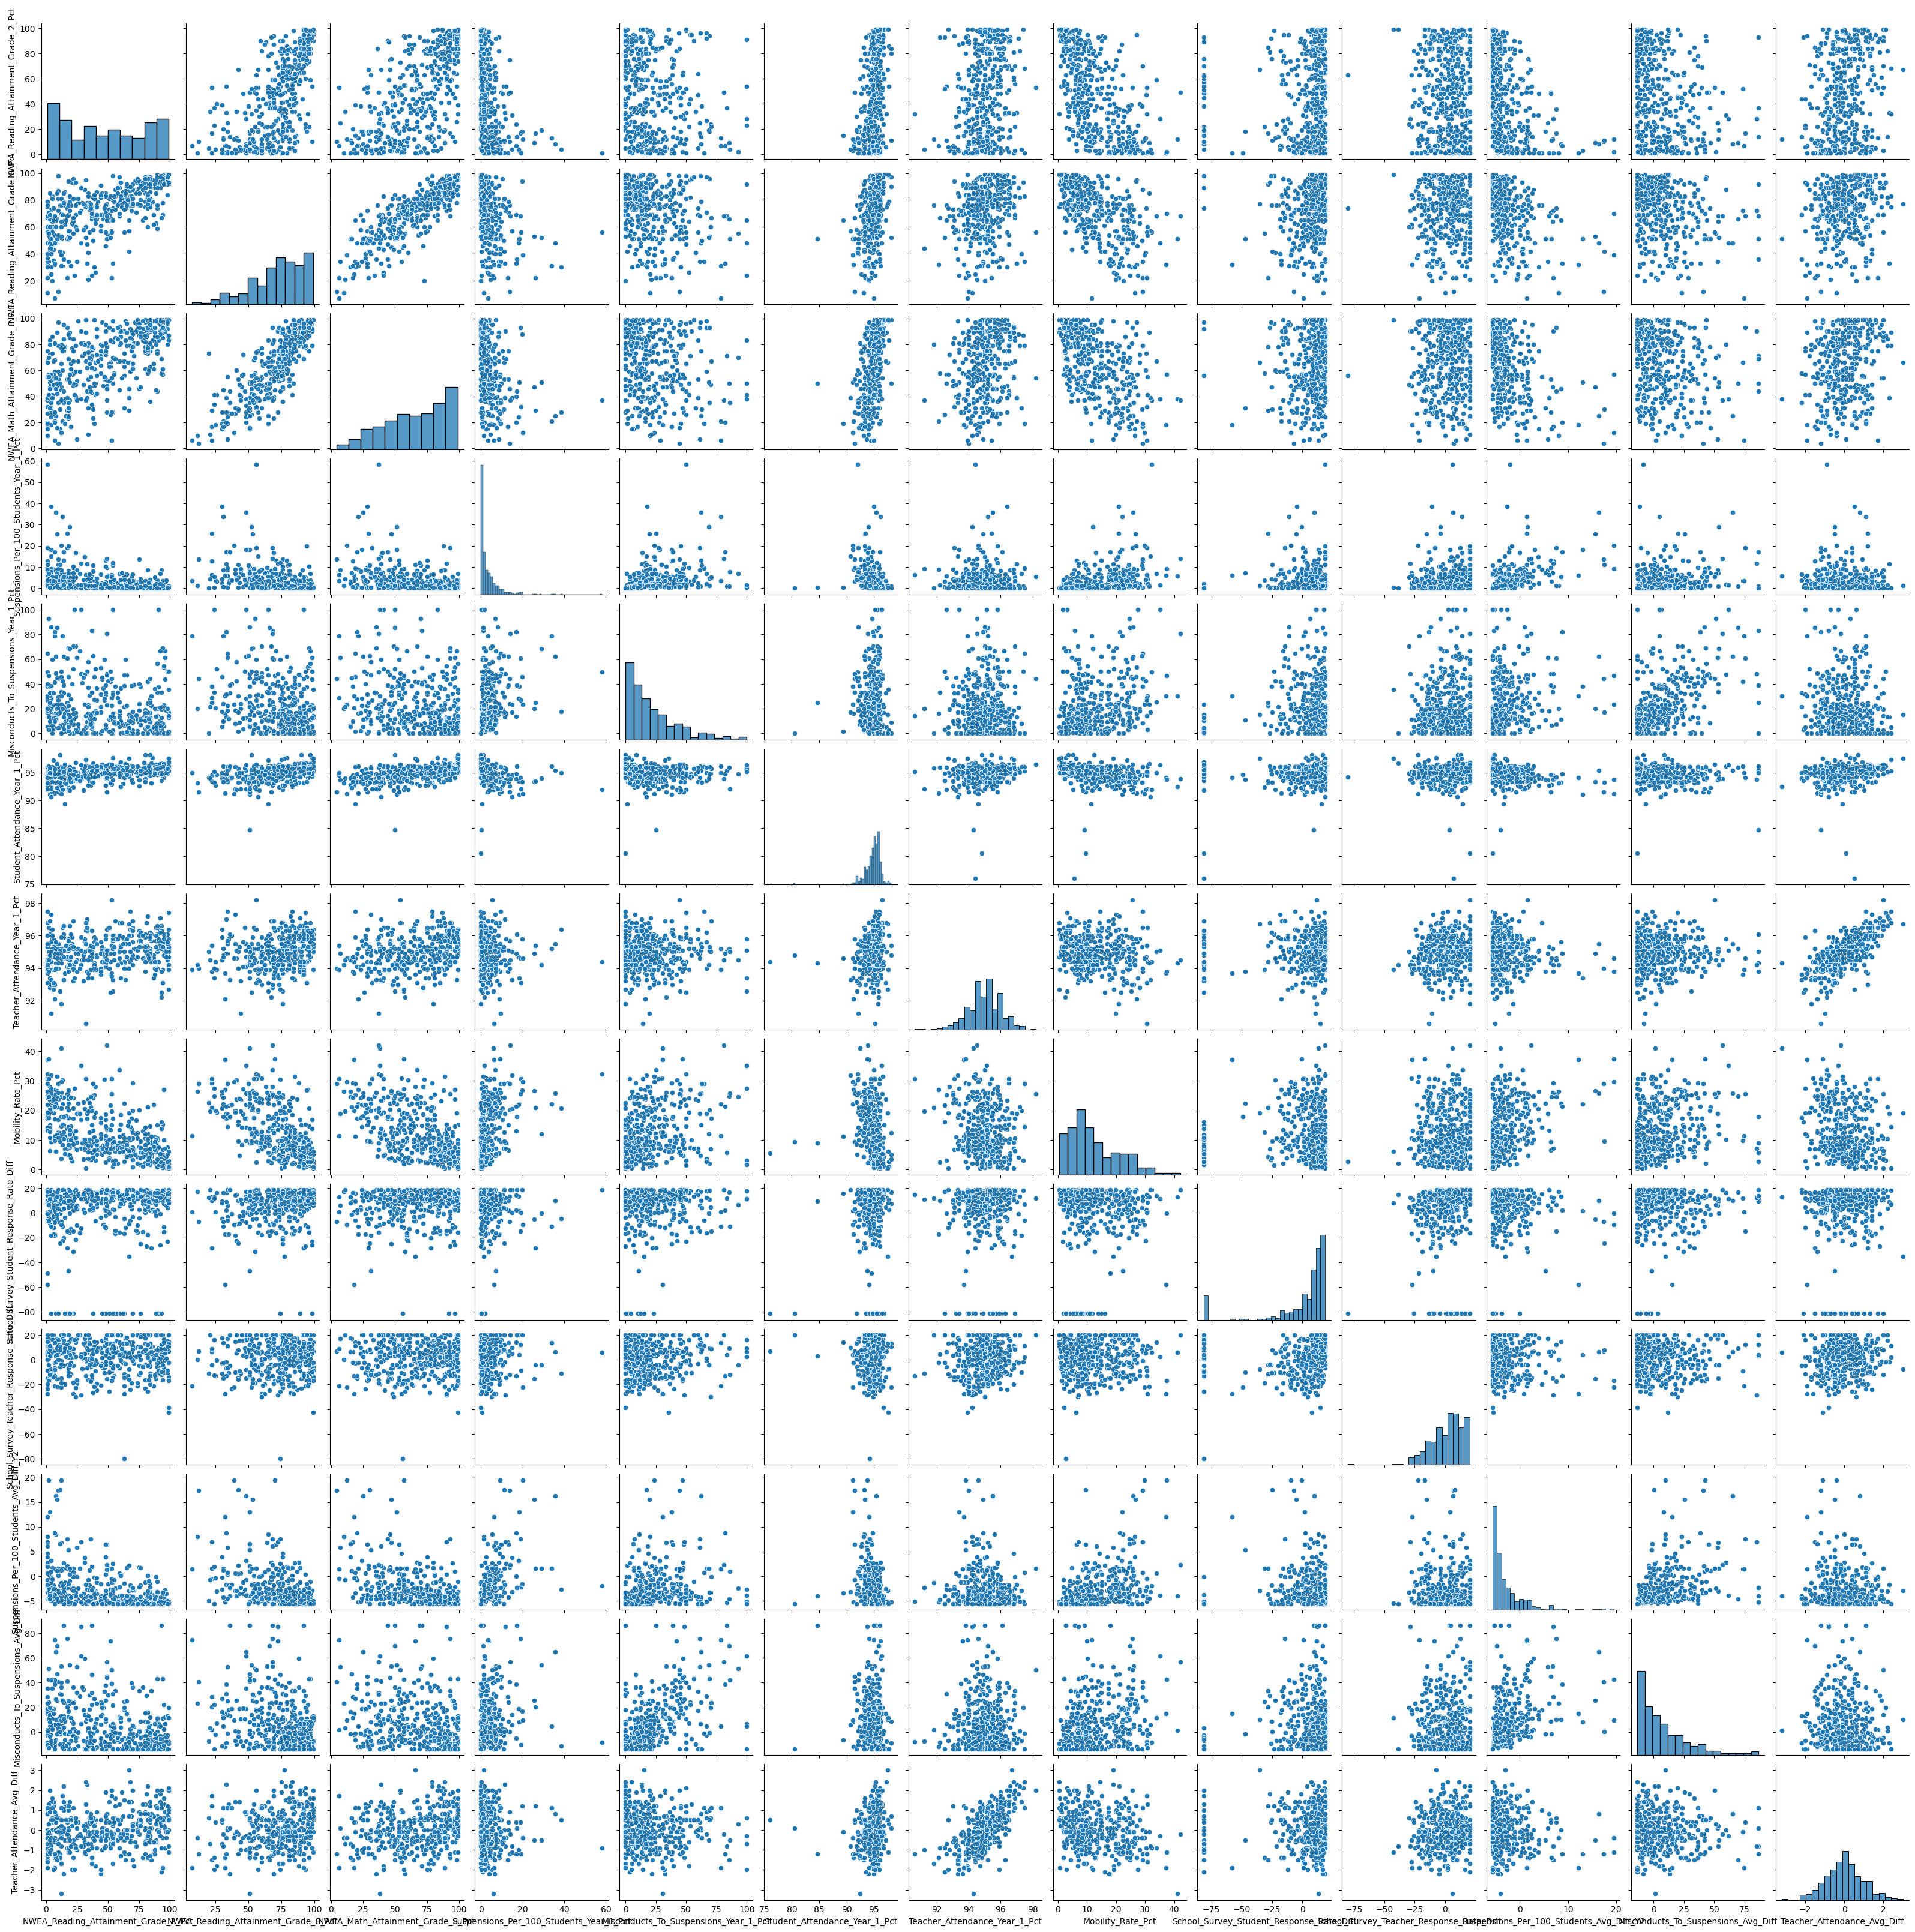

In [91]:
sns.pairplot(elementary_df[corr_cols])
plt.show()

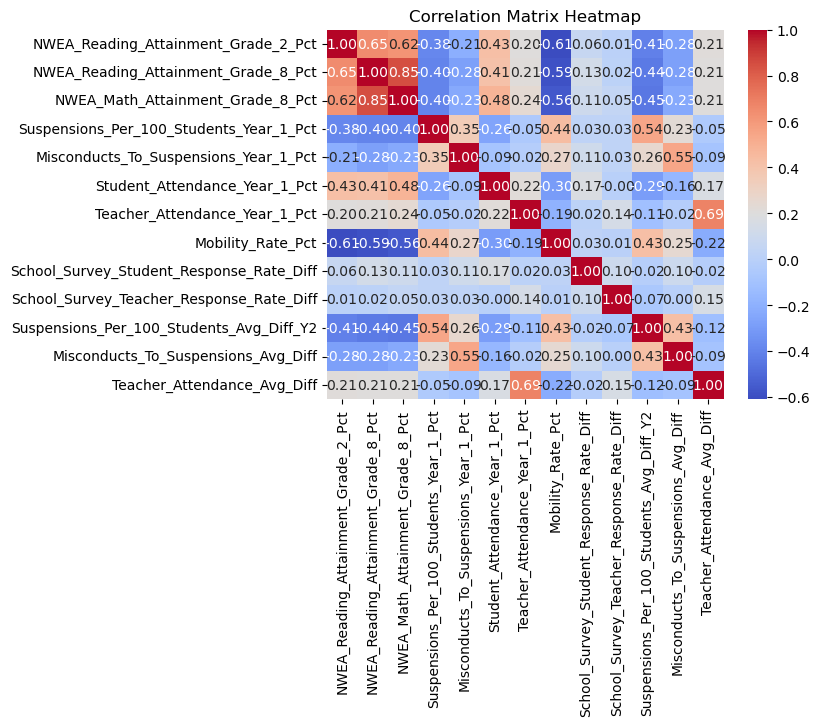

In [92]:
es_corr_mtx = elementary_df[corr_cols].corr() #

# Visualize the correlation matrix
sns.heatmap(es_corr_mtx, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

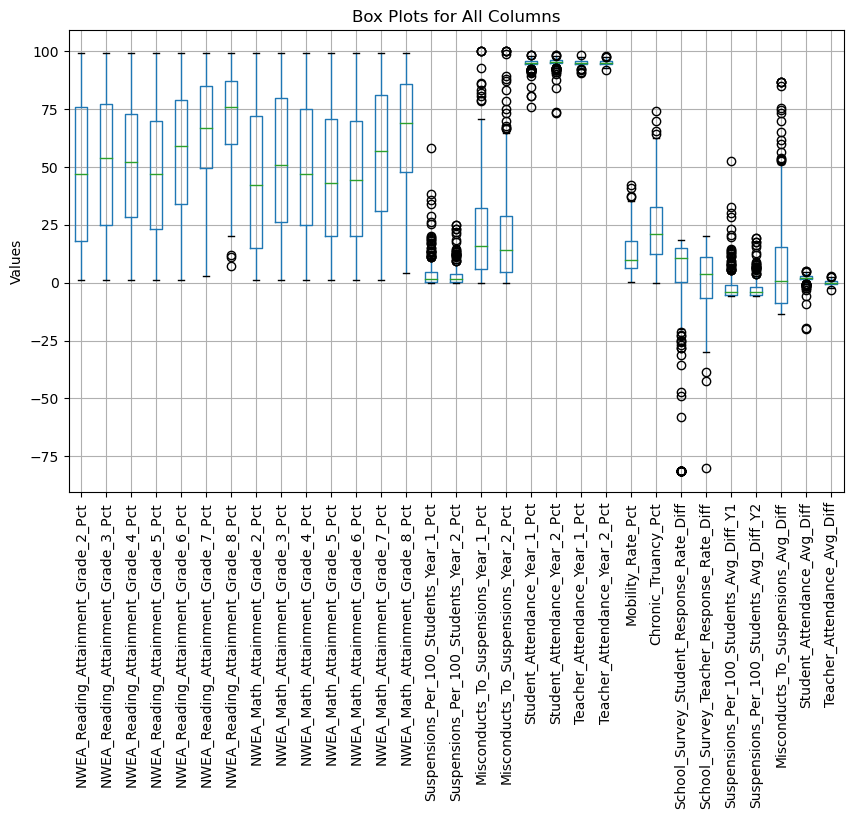

In [402]:
# Create box plots for every column
elementary_df.iloc[:,6:].boxplot(figsize=(10, 6))
plt.title("Box Plots for All Columns")
plt.ylabel("Values")
# Set x-axis labels to vertical
plt.xticks(rotation=90)
plt.show()

Let's start bringing in the categorical data

In [94]:

cat_vars = ['School_ID', 'School_Type', 'Student_Attainment_Rating','Culture_Climate_Rating','Healthy_School_Certification', 'Creative_School_Certification',
'School_Survey_Involved_Families', 'School_Survey_Supportive_Environment', 'School_Survey_Ambitious_Instruction', 
'School_Survey_Effective_Leaders', 'School_Survey_Collaborative_Teachers', 'School_Survey_Safety', 'School_Survey_School_Community',
'School_Survey_Parent_Teacher_Partnership', 'School_Survey_Quality_Of_Facilities', 'Supportive_School_Award'
]
dat[cat_vars].head(3)

School_ID   School_Type Student_Attainment_Rating Culture_Climate_Rating  \
0     609710  Neighborhood    FAR BELOW EXPECTATIONS    PARTIALLY ORGANIZED   
1     610059        Magnet         FAR ABOVE AVERAGE         WELL ORGANIZED   
2     610334         Small    FAR BELOW EXPECTATIONS         WELL ORGANIZED   

  Healthy_School_Certification Creative_School_Certification  \
0                 Not Achieved                        STRONG   
1                 Not Achieved                     EXCELLING   
2                 Not Achieved                    DEVELOPING   

  School_Survey_Involved_Families School_Survey_Supportive_Environment  \
0                            WEAK                              NEUTRAL   
1                          STRONG                               STRONG   
2                         NEUTRAL                              NEUTRAL   

  School_Survey_Ambitious_Instruction School_Survey_Effective_Leaders  \
0                              STRONG                            WEAK   
1                         VERY STRONG                         NEUTRAL   
2                              STRONG                          STRONG   

  School_Survey_Collaborative_Teachers School_Survey_Safety  \
0                                 WEAK                 WEAK   
1                              NEUTRAL               STRONG   
2                               STRONG                 WEAK   

  School_Survey_School_Community School_Survey_Parent_Teacher_Partnership  \
0                    VERY STRONG                                   STRONG   
1                        NEUTRAL                                   STRONG   
2                NOT ENOUGH DATA                          NOT ENOUGH DATA   

  School_Survey_Quality_Of_Facilities Supportive_School_Award  
0                              STRONG                EMERGING  
1                             NEUTRAL                EMERGING  
2                     NOT ENOUGH DATA             ESTABLISHED

In [95]:
elementary = elementary_df.merge(dat[cat_vars], on='School_ID')
# Note: there are no na values in the categorical columns

In [96]:
elementary.School_Type.value_counts()/len(elementary)

Neighborhood              0.736170
Charter                   0.112766
Magnet                    0.076596
Small                     0.025532
Regional gifted center    0.021277
Classical                 0.012766
Special Education         0.008511
Contract                  0.004255
Citywide-Option           0.002128
Name: School_Type, dtype: float64

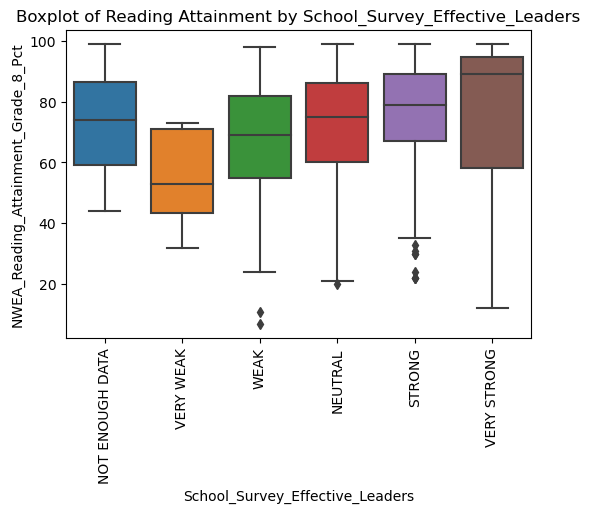

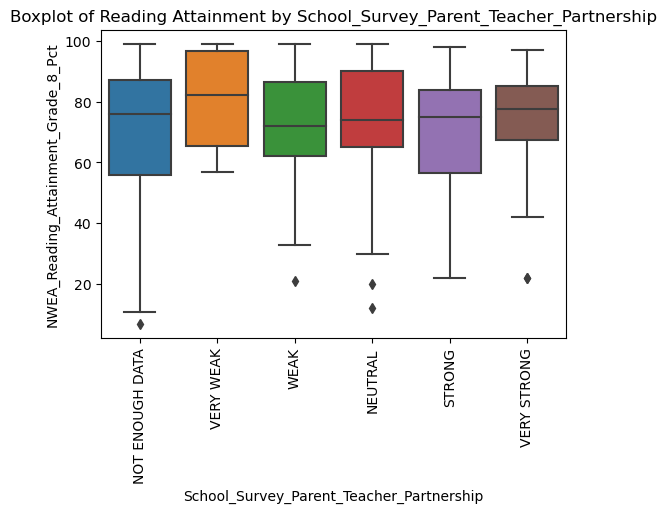

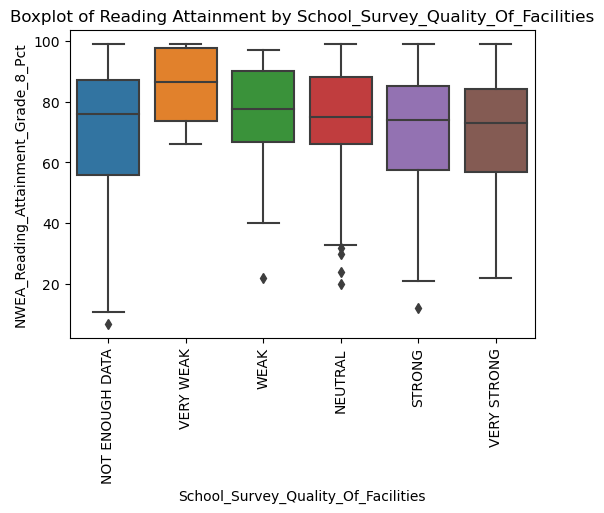

In [390]:
desired_order = ['NOT ENOUGH DATA', 'VERY WEAK', 'WEAK', 'NEUTRAL', 'STRONG', 'VERY STRONG']

ordered_cats = [#'School_Survey_Involved_Families', 'School_Survey_Supportive_Environment', 'School_Survey_Ambitious_Instruction', 
  #'School_Survey_Collaborative_Teachers', 'School_Survey_Safety', 'School_Survey_School_Community',
 'School_Survey_Effective_Leaders','School_Survey_Parent_Teacher_Partnership', 'School_Survey_Quality_Of_Facilities']

for i in ordered_cats:
    
    # Create the boxplot with the specified order
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=i, y='NWEA_Reading_Attainment_Grade_8_Pct', data=elementary, order=desired_order)
    plt.title(f'Boxplot of Reading Attainment by {i}')
   
    plt.xticks(rotation=90)
    plt.show()

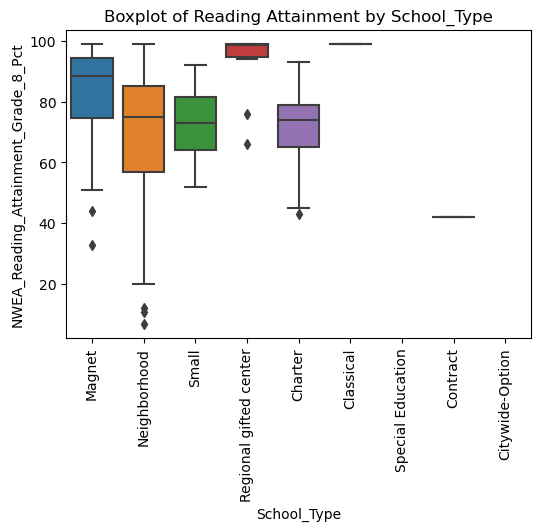

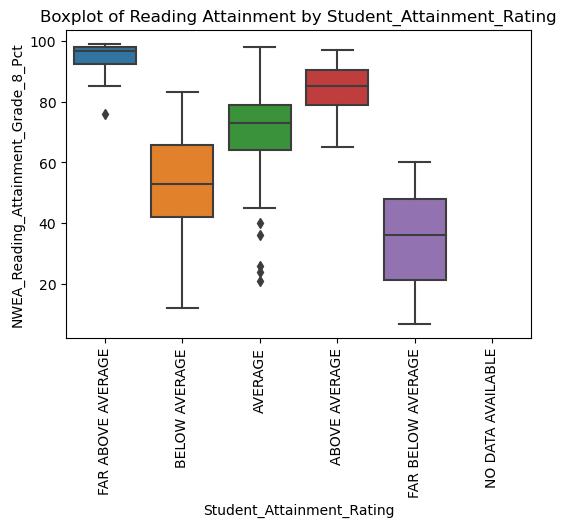

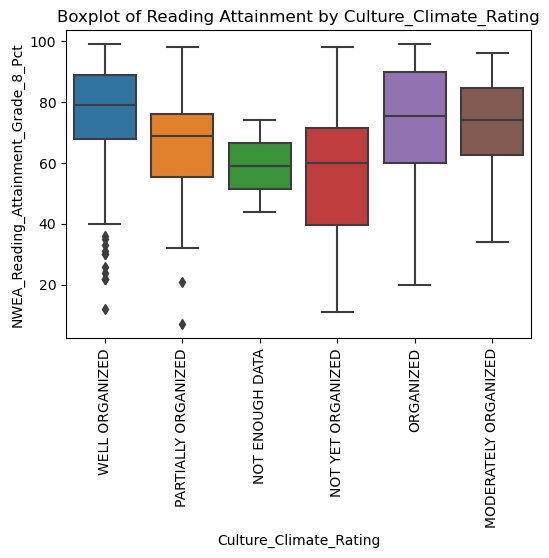

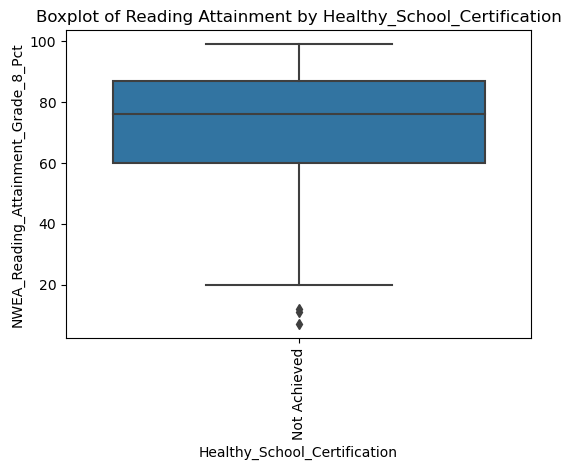

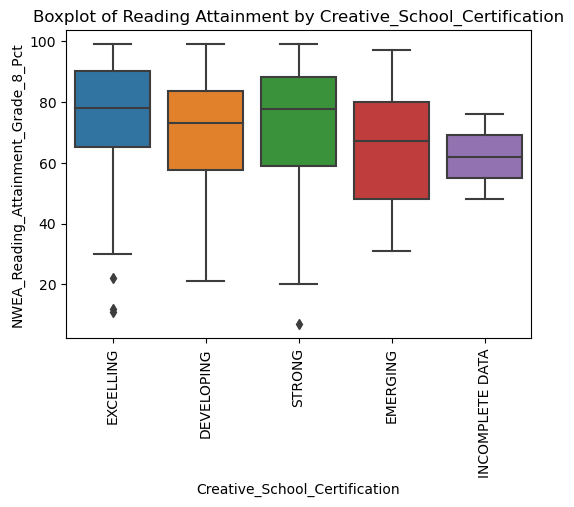

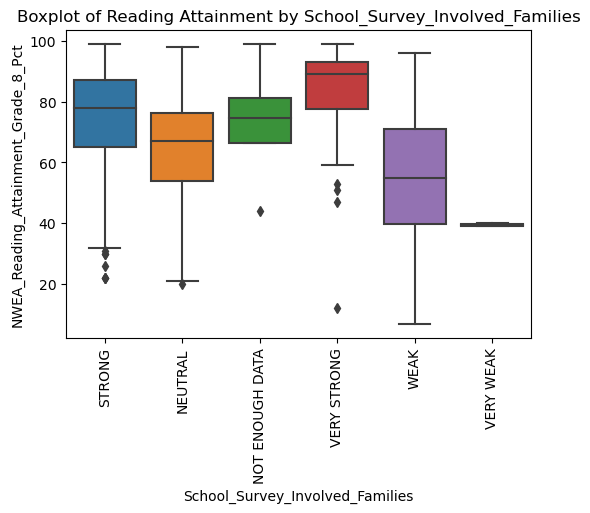

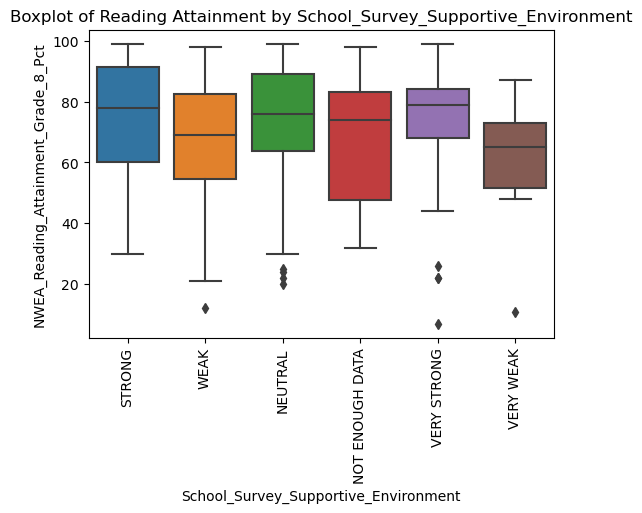

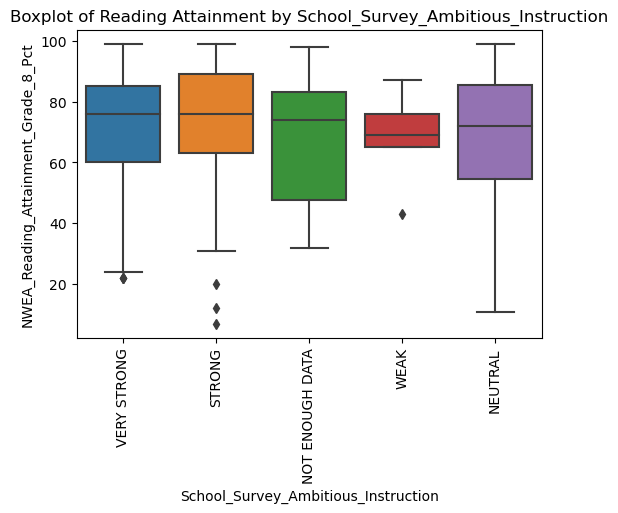

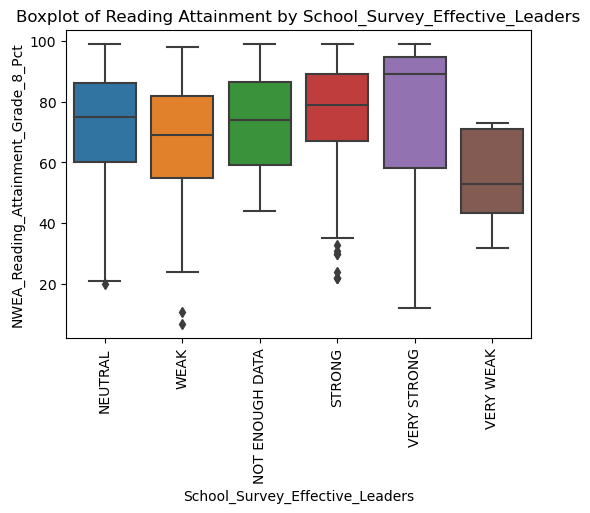

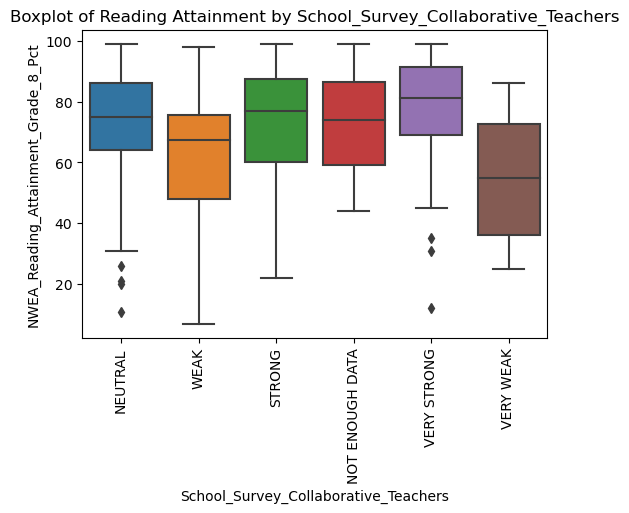

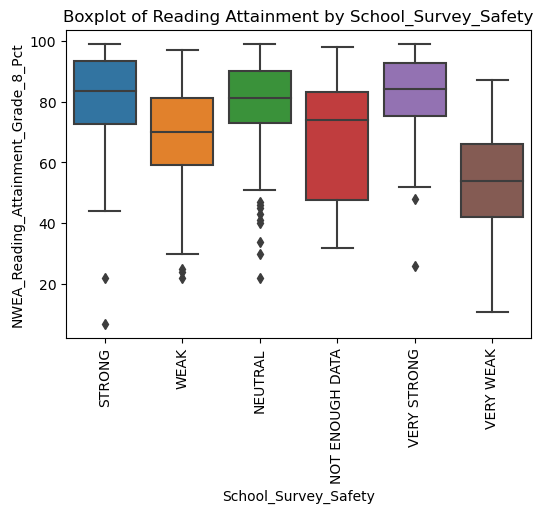

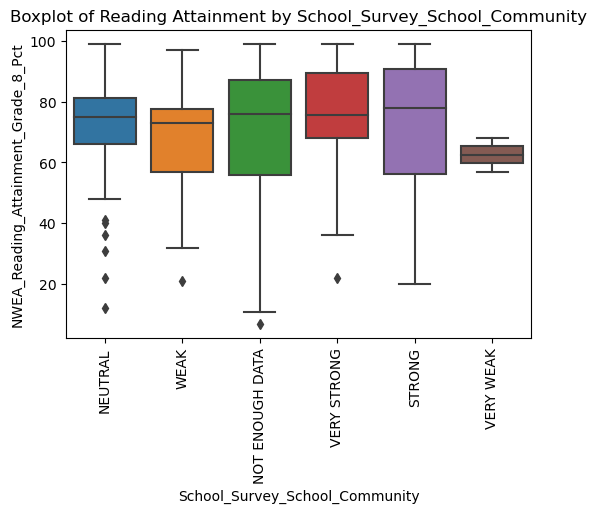

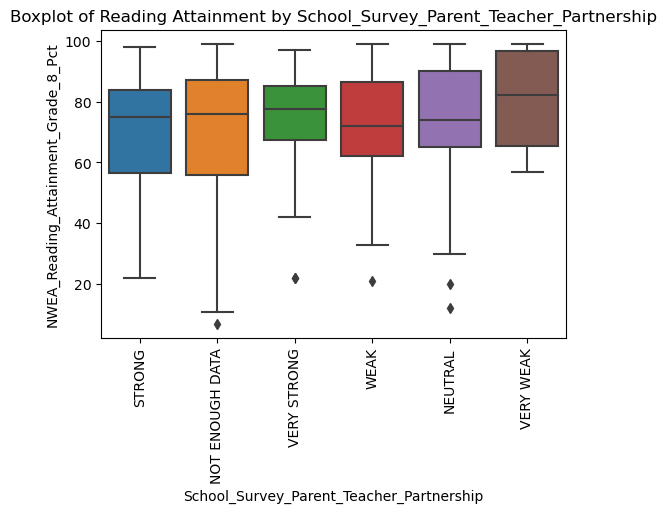

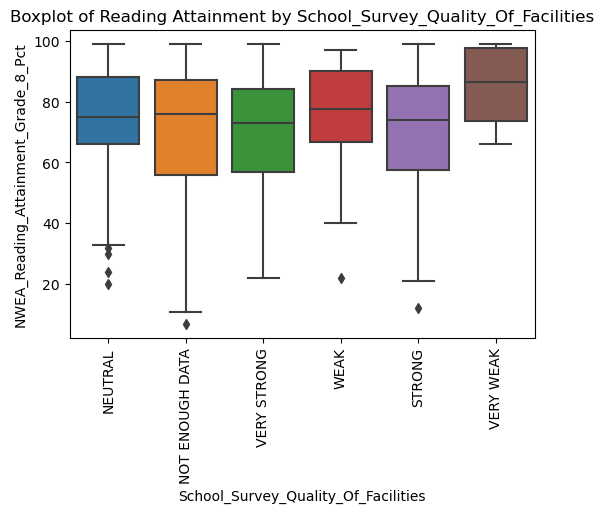

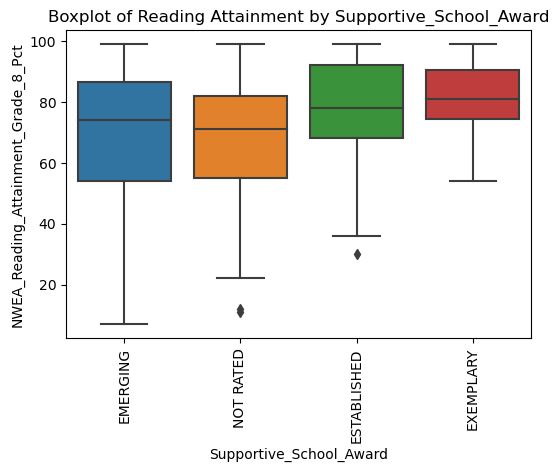

In [97]:

for i in cat_vars[1:]:
    
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=i, y='NWEA_Reading_Attainment_Grade_8_Pct', data=elementary)
    
    plt.title(f'Boxplot of Reading Attainment by {i}')
  
    plt.xticks(rotation=90)
    plt.show()



## <font color='orange'>Elementary School Analytics Summary Points</font>

* Math and reading attainment are positively correlated (as expected) for the same grade
* 8th grade attainment scores (math and reading) have a much higher average and smaller range than grades 2-7
  * the middle 50th percentile can have a range gap of over 50% points
* Correlation between 2nd grade and 8th grade reading attainment is only .65
* Attendance vars for both students and teachers are relatively normally distributed
  * shorter ranges than other vars
* Neighborhood schools make up 74% of school, and have a super wide range in reading attainment
* Charter schools do NOT perform much better than neighborhood schools in terms of top readers and avg readers
* Charter schools perform very similar to small schools, except that they have a lower floor for reading attainment
* Oddly enough, schools with very weak parent/teacher partnership had higher reading attainment levels
* Oddly enough, schools with very weak quality of facilities had higher reading attainment levels

### Notes
* could code categorical variables as numbers so that boxplots would come out ordered and thus easier to understand
* in modeling, be sure to get rid of categorical variables that encode attainment
  

### Adding Census/Map Data

In [118]:
#use frame df. do a spatial join on lats and longs of school


In [105]:

# Make geopandas frame and convert lat long to geometry
elementary = gpd.GeoDataFrame(
    elementary, 
    geometry=gpd.points_from_xy( elementary["School_Longitude"], elementary["School_Latitude"]), crs="EPSG:4326" #EPSG:4269
)

elementary.drop(columns=["School_Latitude", "School_Longitude"], inplace=True)

elementary["school_geom"] = elementary.geometry
elementary.head(1)

/opt/anaconda3/envs/ls_geo_env/lib/python3.7/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


School_ID Primary_Category  School_Survey_Student_Response_Rate_Pct  \
0     610059               ES                                     98.9   

   School_Survey_Teacher_Response_Rate_Pct  \
0                                     79.1   

   NWEA_Reading_Attainment_Grade_2_Pct  NWEA_Reading_Attainment_Grade_3_Pct  \
0                                 96.0                                 93.0   

   NWEA_Reading_Attainment_Grade_4_Pct  NWEA_Reading_Attainment_Grade_5_Pct  \
0                                 97.0                                 93.0   

   NWEA_Reading_Attainment_Grade_6_Pct  NWEA_Reading_Attainment_Grade_7_Pct  \
0                                 95.0                                 99.0   

   NWEA_Reading_Attainment_Grade_8_Pct  NWEA_Math_Attainment_Grade_2_Pct  \
0                                 97.0                              88.0   

   NWEA_Math_Attainment_Grade_3_Pct  NWEA_Math_Attainment_Grade_4_Pct  \
0                              92.0                              94.0   

   NWEA_Math_Attainment_Grade_5_Pct  NWEA_Math_Attainment_Grade_6_Pct  \
0                              88.0                              93.0   

   NWEA_Math_Attainment_Grade_7_Pct  NWEA_Math_Attainment_Grade_8_Pct  \
0                              96.0                              93.0   

   Suspensions_Per_100_Students_Year_1_Pct  \
0                                      1.9   

   Suspensions_Per_100_Students_Year_2_Pct  \
0                                      0.3   

   Misconducts_To_Suspensions_Year_1_Pct  \
0                                   66.7   

   Misconducts_To_Suspensions_Year_2_Pct  Student_Attendance_Year_1_Pct  \
0                                   11.1                           95.0   

   Student_Attendance_Year_2_Pct  Teacher_Attendance_Year_1_Pct  \
0                           95.0                           95.6   

   Teacher_Attendance_Year_2_Pct  Mobility_Rate_Pct  Chronic_Truancy_Pct  \
0                           95.9                3.8                 22.9   

   School_Survey_Student_Response_Rate_Diff  \
0                                      17.5   

   School_Survey_Teacher_Response_Rate_Diff  \
0                                      -0.8   

   Suspensions_Per_100_Students_Avg_Diff_Y1  \
0                                      -3.7   

   Suspensions_Per_100_Students_Avg_Diff_Y2  \
0                                      -5.3   

   Misconducts_To_Suspensions_Avg_Diff  Student_Attendance_Avg_Diff  \
0                                 -2.4                          1.7   

   Teacher_Attendance_Avg_Diff School_Type Student_Attainment_Rating  \
0                          0.9      Magnet         FAR ABOVE AVERAGE   

  Culture_Climate_Rating Healthy_School_Certification  \
0         WELL ORGANIZED                 Not Achieved   

  Creative_School_Certification School_Survey_Involved_Families  \
0                     EXCELLING                          STRONG   

  School_Survey_Supportive_Environment School_Survey_Ambitious_Instruction  \
0                               STRONG                         VERY STRONG   

  School_Survey_Effective_Leaders School_Survey_Collaborative_Teachers  \
0                         NEUTRAL                              NEUTRAL   

  School_Survey_Safety School_Survey_School_Community  \
0               STRONG                        NEUTRAL   

  School_Survey_Parent_Teacher_Partnership  \
0                                   STRONG   

  School_Survey_Quality_Of_Facilities Supportive_School_Award  \
0                             NEUTRAL                EMERGING   

                     geometry                 school_geom  
0  POINT (-87.65729 41.92320)  POINT (-87.65729 41.92320)

Text(0.5, 1.0, 'Chicago Public Elementary Schools')

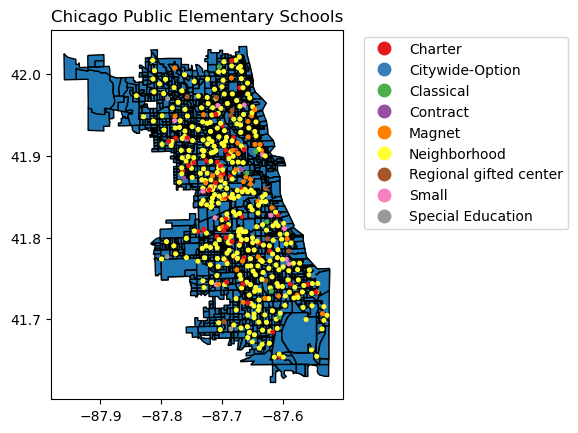

In [128]:
f, ax = plt.subplots()
df["geometry"].plot(ax=ax,  edgecolor='black')
elementary.plot(ax=ax, column="School_Type", cmap="Set1", markersize=7, legend=True)#.plot(ax=ax, color='red', markersize=5)

# Adjust legend position
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.05, 1))  # Move the legend outside the map to the right

plt.title("Chicago Public Elementary Schools")


In [168]:
# by right joining, we may end up missing some blk grps if we want to map later
es_df =gpd.sjoin(elementary, df,  op="intersects").reset_index(drop=True)

print(len(es_df))

# get rid of duplicates created by merging with census data.
es_df = es_df.drop_duplicates('School_ID', keep='first')
print(len(es_df))
print(es_df.columns)

767
470
Index(['School_ID', 'Primary_Category',
       'School_Survey_Student_Response_Rate_Pct',
       'School_Survey_Teacher_Response_Rate_Pct',
       'NWEA_Reading_Attainment_Grade_2_Pct',
       'NWEA_Reading_Attainment_Grade_3_Pct',
       'NWEA_Reading_Attainment_Grade_4_Pct',
       'NWEA_Reading_Attainment_Grade_5_Pct',
       'NWEA_Reading_Attainment_Grade_6_Pct',
       'NWEA_Reading_Attainment_Grade_7_Pct',
       'NWEA_Reading_Attainment_Grade_8_Pct',
       'NWEA_Math_Attainment_Grade_2_Pct', 'NWEA_Math_Attainment_Grade_3_Pct',
       'NWEA_Math_Attainment_Grade_4_Pct', 'NWEA_Math_Attainment_Grade_5_Pct',
       'NWEA_Math_Attainment_Grade_6_Pct', 'NWEA_Math_Attainment_Grade_7_Pct',
       'NWEA_Math_Attainment_Grade_8_Pct',
       'Suspensions_Per_100_Students_Year_1_Pct',
       'Suspensions_Per_100_Students_Year_2_Pct',
       'Misconducts_To_Suspensions_Year_1_Pct',
       'Misconducts_To_Suspensions_Year_2_Pct',
       'Student_Attendance_Year_1_Pct', 'Student_Atten

In [169]:
print(len(es_df.columns))

62


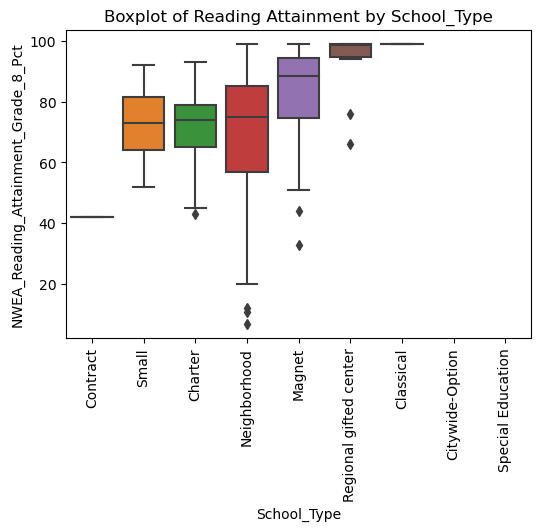

In [403]:
median_order = (
    elementary.groupby('School_Type')['NWEA_Reading_Attainment_Grade_8_Pct']
    .median()
    .sort_values(ascending=True)
    .index
)
plt.figure(figsize=(6, 4))
sns.boxplot(x='School_Type', y='NWEA_Reading_Attainment_Grade_8_Pct', data=elementary, order=median_order)
plt.title(f'Boxplot of Reading Attainment by School_Type')

plt.xticks(rotation=90)
plt.show()

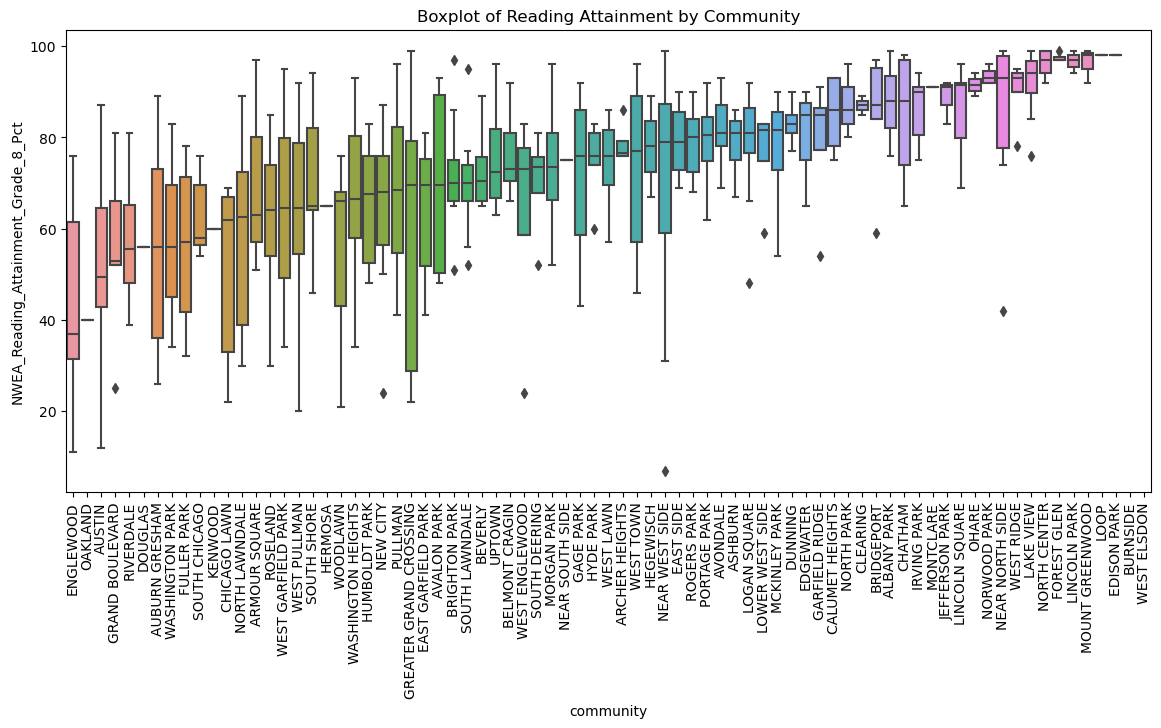

In [397]:
#boxplot of reading attainment by community
# Calculate the median of the y-variable for each category in cat_var
median_order = (
    es_df.groupby('community')['NWEA_Reading_Attainment_Grade_8_Pct']
    .median()
    .sort_values(ascending=True)
    .index
)
plt.figure(figsize=(14,6))
sns.boxplot(x='community', y='NWEA_Reading_Attainment_Grade_8_Pct', data=es_df, order=median_order)

plt.title(f'Boxplot of Reading Attainment by Community')
#plt.xlabel('Category')
#plt.ylabel('Value')
plt.xticks(rotation=90)
plt.show()

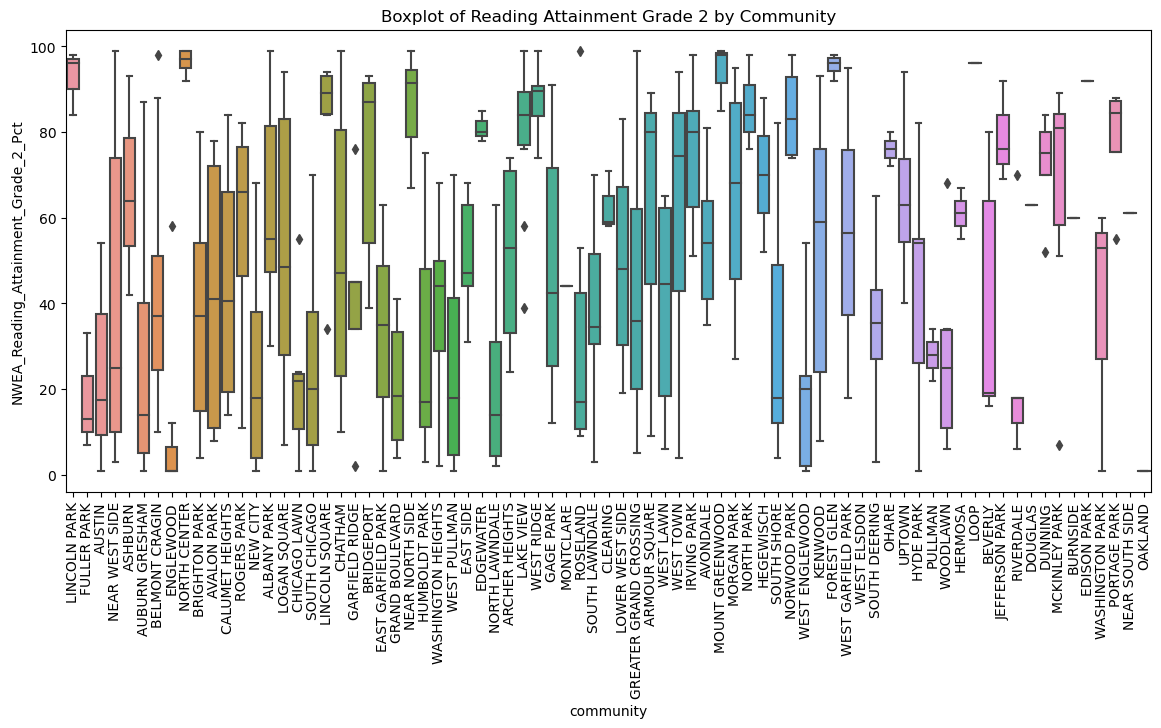

In [171]:
plt.figure(figsize=(14,6))
sns.boxplot(x='community', y='NWEA_Reading_Attainment_Grade_2_Pct', data=es_df)

plt.title(f'Boxplot of Reading Attainment Grade 2 by Community')

plt.xticks(rotation=90)
plt.show()

In [172]:
# Pick some column indexes to explore visually in correlation
corr_cols = [es_df.columns[i] for i in [4,10,11,17, 19, 57,58,59,60,61]]

sns.pairplot(es_df[corr_cols])
plt.show()



NameError: name 'es_df_df' is not defined

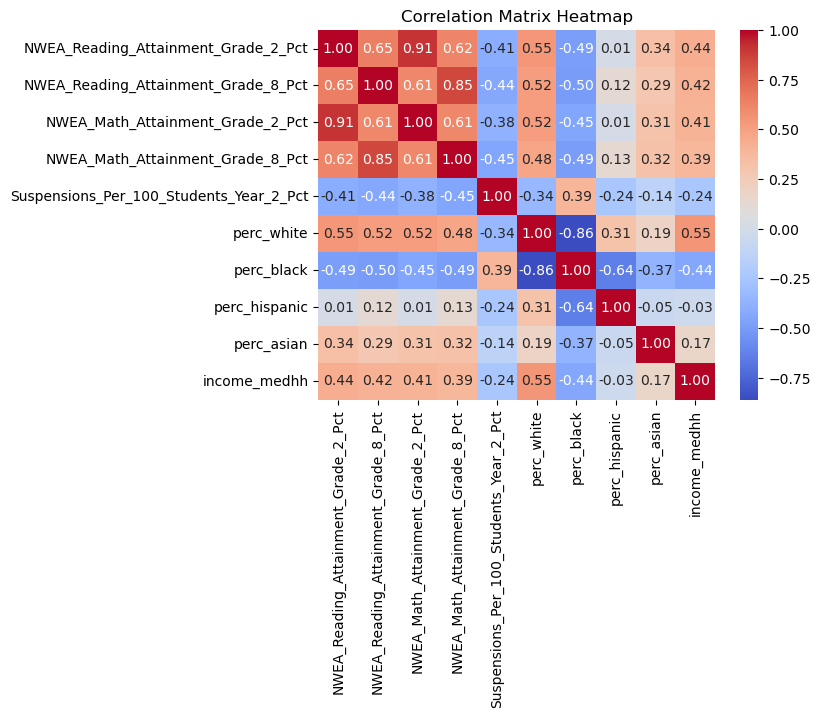

In [173]:
es_corr_mtx = es_df[corr_cols].corr() #

# Visualize the correlation matrix
sns.heatmap(es_corr_mtx, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [174]:
# think about creating categorical vars for race to see if can get a better view of how it relates to attainment.
# For example >65% white is "Majority White". Or maybe just use bucket: low median high for white % , and same for black and hispanic.
# do this and visualize as a plot...then can move on to modeling

# Define bins and labels
bins = [0, 0.33, 0.66, 1]  # Define the range for low, medium, high
labels = ['Low', 'Medium', 'High']

# Create a categorical column
es_df['white_bins'] = pd.cut(es_df['perc_white'], bins=bins, labels=labels, include_lowest=True)
es_df['black_bins'] = pd.cut(es_df['perc_black'], bins=bins, labels=labels, include_lowest=True)
es_df['hispanic_bins'] = pd.cut(es_df['perc_hispanic'], bins=bins, labels=labels, include_lowest=True)


In [175]:
for i in ['white_bins', 'black_bins', 'hispanic_bins']:
    print(i)
    print(es_df[i].value_counts()/len(es_df))

white_bins
Low       0.480851
Medium    0.289362
High      0.200000
Name: white_bins, dtype: float64
black_bins
Low       0.534043
High      0.361702
Medium    0.074468
Name: black_bins, dtype: float64
hispanic_bins
Low       0.617021
Medium    0.187234
High      0.165957
Name: hispanic_bins, dtype: float64


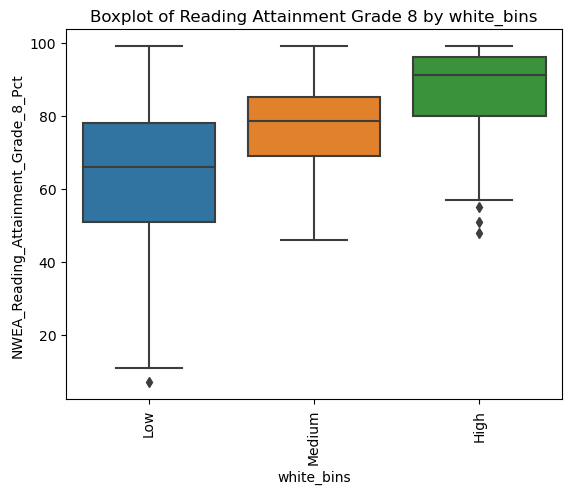

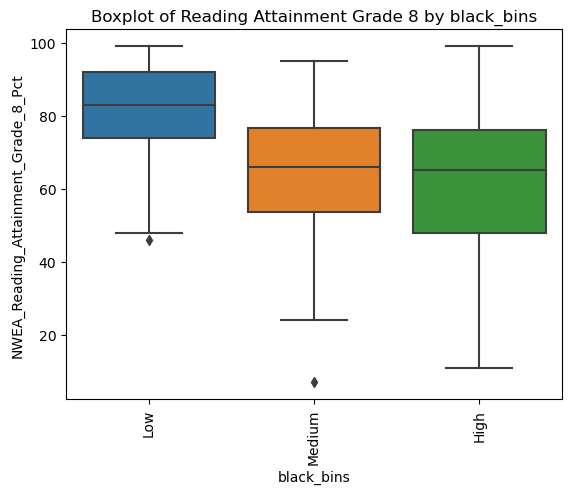

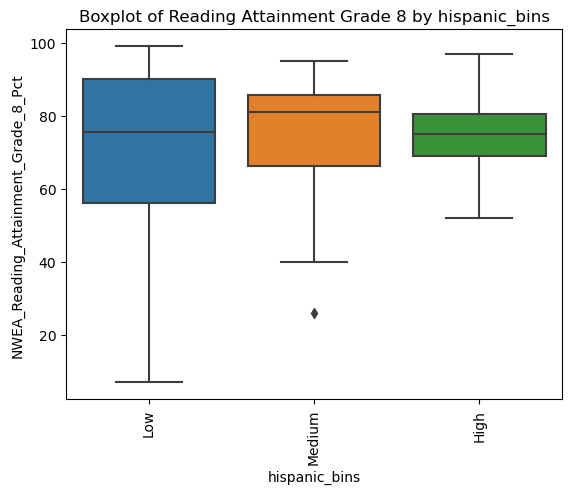

In [398]:
bin_orders = ['Low', 'Medium', 'High']
for i in ['white_bins', 'black_bins', 'hispanic_bins']:

    plt.figure()
    sns.boxplot(x=i, y='NWEA_Reading_Attainment_Grade_8_Pct', data=es_df, order=bin_orders)
    
    plt.title(f'Boxplot of Reading Attainment Grade 8 by {i}')
    
    plt.xticks(rotation=90)
    plt.show()

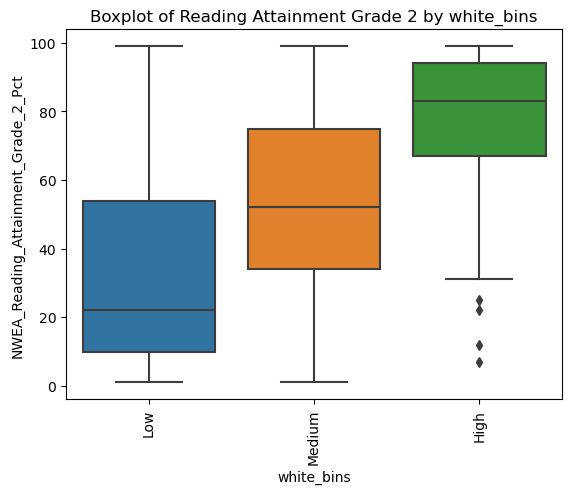

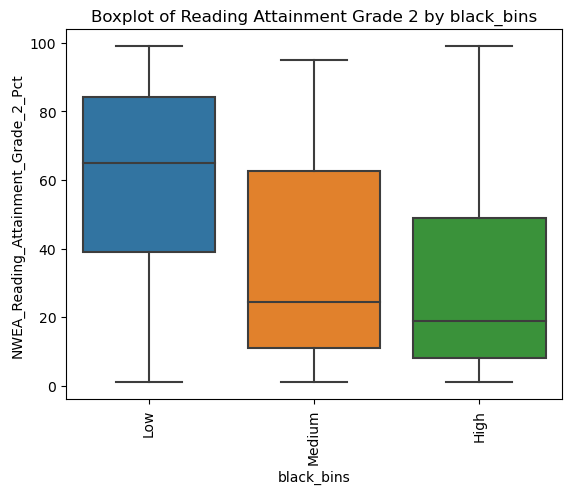

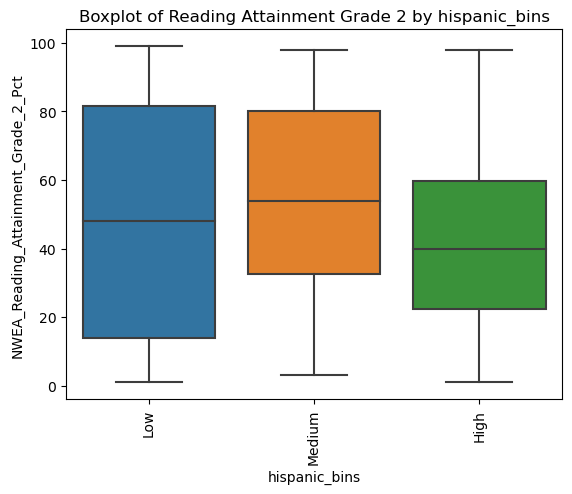

In [177]:
for i in ['white_bins', 'black_bins', 'hispanic_bins']:

    plt.figure()
    sns.boxplot(x=i, y='NWEA_Reading_Attainment_Grade_2_Pct', data=es_df)
    
    plt.title(f'Boxplot of Reading Attainment Grade 2 by {i}')
    
    plt.xticks(rotation=90)
    plt.show()

* There doesn't seem to be any strong correlations to attainment and race/income. Note that these census metrics are just for the block group that the school is located in...it's possible that this is too micro to be a good reflection of school makeup. Or even if people who live in that block group go to that school.
* When we break race pop into bins, there are some clear indications that schools in higher % white block groups perform better with reading, and in higher % black block groups perform worse with reading
* Gap between top and bottom closes a ton when comparing 8th grade attainment to 2nd grade

Notes:
* again, some kind of ordering would be helpful to get a grip on our boxplots (community vs attainment). Maybe order x axis by median of y
* ordered categorical vars

# <font color='green'>Elementary School Modeling</font>

In [150]:
import statsmodels.api as sm

### <font color='green'>Dataset and Vars</font>

In [266]:
print(len(es_df.columns))
var_lst = ['pop_total', 'perc_white', 'perc_black', 'perc_hispanic','perc_asian', 'income_medhh',
 'School_Survey_Student_Response_Rate_Pct', 'School_Survey_Teacher_Response_Rate_Pct',
 'Suspensions_Per_100_Students_Year_1_Pct', 'Suspensions_Per_100_Students_Year_2_Pct', 
 'Misconducts_To_Suspensions_Year_1_Pct','Misconducts_To_Suspensions_Year_2_Pct',
 'Student_Attendance_Year_1_Pct', 'Student_Attendance_Year_2_Pct',
 'Teacher_Attendance_Year_1_Pct', 'Teacher_Attendance_Year_2_Pct',
 'Mobility_Rate_Pct', 'Chronic_Truancy_Pct',
 'School_Survey_Student_Response_Rate_Diff', 'School_Survey_Teacher_Response_Rate_Diff',
 'Suspensions_Per_100_Students_Avg_Diff_Y1', 'Suspensions_Per_100_Students_Avg_Diff_Y2',
 'Misconducts_To_Suspensions_Avg_Diff', 'Student_Attendance_Avg_Diff', 'Teacher_Attendance_Avg_Diff', 
 'School_Type', 'Culture_Climate_Rating',
       'Healthy_School_Certification', 'Creative_School_Certification',
       'School_Survey_Involved_Families',
       'School_Survey_Supportive_Environment',
       'School_Survey_Ambitious_Instruction',
       'School_Survey_Effective_Leaders',
       'School_Survey_Collaborative_Teachers', 'School_Survey_Safety',
       'School_Survey_School_Community',
       'School_Survey_Parent_Teacher_Partnership',
       'School_Survey_Quality_Of_Facilities', 
 'community', 'white_bins', 'black_bins', 'hispanic_bins'
]
print(len(var_lst))

65
42


In [267]:
# There are some instances where our target is missing in the data. Create a new dataframe where 
# can work specifically with data for modeling

mydf = es_df
print(len(mydf))
mydf = mydf.dropna(subset=['NWEA_Reading_Attainment_Grade_8_Pct'])
print(len(mydf))

470
418


### <font color='purple'>First Model Try</font>

In [268]:
# Independent variables
X = mydf[var_lst] 


# deal with na's (statsmodel cannot handle them)

# Fill numeric columns with the mean 
for i in var_lst[0:25]:
    
    X[i] = X[i].fillna(X[i].mean())

# Fill in cat columns with "missing"
for i in var_lst[26:]:
    if X[i].dtype.name == 'category':  # Check if the column is categorical
        # Add "missing" to the categories
        X[i] = X[i].cat.add_categories("missing")
    # Fill missing values with "missing"
    X[i] = X[i].fillna("missing")
   
    
#X.isna().sum()

/opt/anaconda3/envs/ls_geo_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/envs/ls_geo_env/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/envs/ls_geo_env/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [269]:

#high_VIFs = [x for x in high_VIFs if x not in ['perc_white','perc_black','white_bins_High', 'black_bins_High']]

In [270]:
# Define independent (X) and dependent (Y) variables

X = sm.add_constant(X)  # Adds an intercept (constant term)...this is not automatic in statsmodel
Y = mydf['NWEA_Reading_Attainment_Grade_8_Pct']            # Dependent variable


# One-hot encode the categorical variable
X = pd.get_dummies(X,  drop_first=True)  # Drop one category to avoid multicollinearity. it will process categorical columns while leaving numeric columns unchanged.
print(f"X variable count: {len(X.columns)}")

# ******** Next iteration of model vars
# Did a VIF check for multicolineary. Dropping high VIF vars, and adding a few back in
#X = X.drop(columns=high_VIFs)
X.columns

X variable count: 168


Index(['const', 'pop_total', 'perc_white', 'perc_black', 'perc_hispanic',
       'perc_asian', 'income_medhh', 'School_Survey_Student_Response_Rate_Pct',
       'School_Survey_Teacher_Response_Rate_Pct',
       'Suspensions_Per_100_Students_Year_1_Pct',
       ...
       'community_WOODLAWN', 'white_bins_Medium', 'white_bins_High',
       'white_bins_missing', 'black_bins_Medium', 'black_bins_High',
       'black_bins_missing', 'hispanic_bins_Medium', 'hispanic_bins_High',
       'hispanic_bins_missing'],
      dtype='object', length=168)

In [271]:
# Fit the model
model = sm.OLS(Y, X).fit()

# Summary of regression
print(model.summary())

                                     OLS Regression Results                                    
Dep. Variable:     NWEA_Reading_Attainment_Grade_8_Pct   R-squared:                       0.700
Model:                                             OLS   Adj. R-squared:                  0.526
Method:                                  Least Squares   F-statistic:                     4.026
Date:                                 Wed, 11 Dec 2024   Prob (F-statistic):           1.77e-23
Time:                                         15:07:35   Log-Likelihood:                -1582.0
No. Observations:                                  418   AIC:                             3472.
Df Residuals:                                      264   BIC:                             4093.
Df Model:                                          153                                         
Covariance Type:                             nonrobust                                         
                                        

### <font color='orange'>These initial results are interesting</font>
* Good Rsquare of .7
* But non of the individuals vars have a good p value, so what's significant
* multicollineary ? mentioned in summary notes

Next
* may be good to go through and test the assumptions of linear regression. Could be a good exercise anyway.
* Automatic feature selection ? (stepwise, etc)
* Do a train/test split to tell how well this model would actually perform
* move on to a nonparametric model (tree/ensemble)
* Just for learning and interview purposes...be able to explain everything in summary output

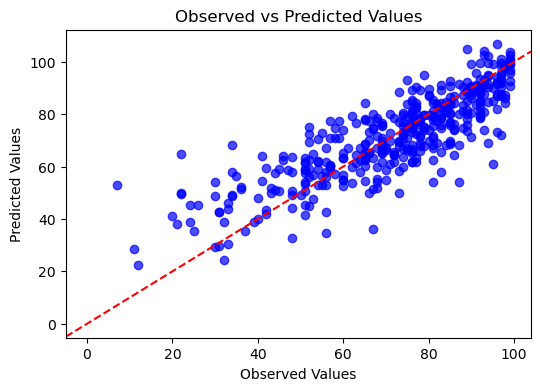

Durbin-Watson statistic: 2.115189288939039


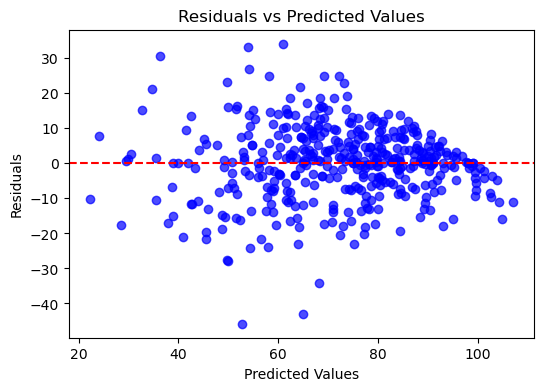

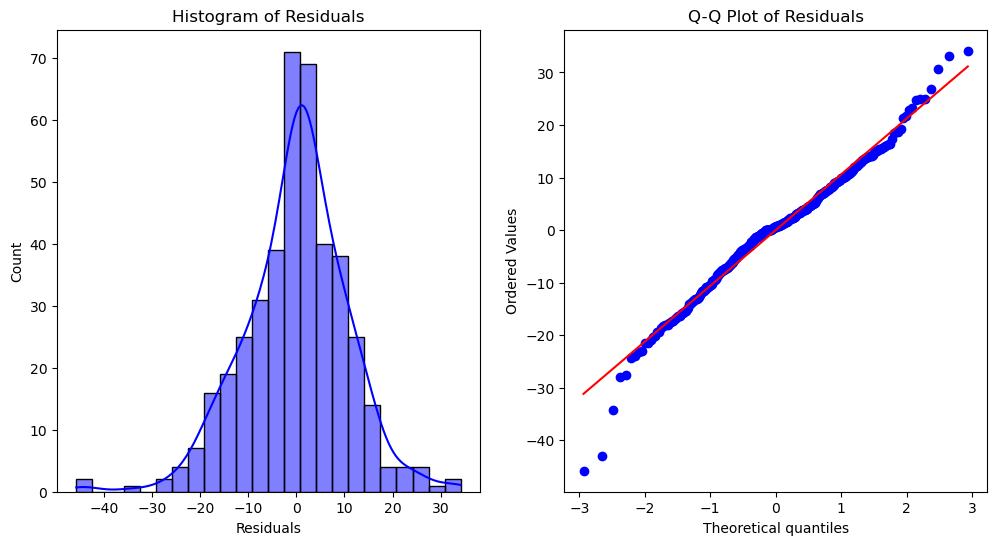

/opt/anaconda3/envs/ls_geo_env/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/envs/ls_geo_env/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                                                      Feature        VIF
0                                                       const   0.000000
1                                                   pop_total   1.956103
2                                                  perc_white  39.694414
3                                                  perc_black  90.693127
4                                               perc_hispanic  35.178097
5                                                  perc_asian   5.836094
6                                                income_medhh   3.278089
7                     School_Survey_Student_Response_Rate_Pct        inf
8                     School_Survey_Teacher_Response_Rate_Pct        inf
9                     Suspensions_Per_100_Students_Year_1_Pct        inf
10                    Suspensions_Per_100_Students_Year_2_Pct        inf
11                      Misconducts_To_Suspensions_Year_1_Pct   2.531749
12                      Misconducts_To_Suspensions_

In [272]:
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import probplot


# 1. Linearity: Plot observed vs predicted values
plt.figure(figsize=(6, 4))
plt.scatter(Y, model.fittedvalues, alpha=0.7, color="blue")
plt.title("Observed vs Predicted Values")
plt.xlabel("Observed Values")
plt.ylabel("Predicted Values")
plt.axline([0, 0], [1, 1], color="red", linestyle="--")  # Ideal fit line
plt.show()

# 2. Independence: Check Durbin-Watson statistic
dw_stat = durbin_watson(model.resid)
print(f"Durbin-Watson statistic: {dw_stat}")
# DW ~ 2 indicates no autocorrelation

# 3. Homoscedasticity: Plot residuals vs predicted values
plt.figure(figsize=(6, 4))
plt.scatter(model.fittedvalues, model.resid, alpha=0.7, color="blue")
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(0, color="red", linestyle="--")
plt.show()

# 4. Normality of Residuals: Histogram and Q-Q Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(model.resid, kde=True, color="blue")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")

plt.subplot(1, 2, 2)
probplot(model.resid, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

# 5. Multicollinearity: Check Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)
# VIF > 10 indicates high multicollinearity


In [273]:
high_VIFs = list(vif_data[vif_data["VIF"] >10]["Feature"])

### Next Model Iteration

In [274]:
# Independent variables
X = mydf[var_lst] 

# Fill numeric columns with the mean 
for i in var_lst[0:25]:
    
    X[i] = X[i].fillna(X[i].mean())

# Fill in cat columns with "missing"
for i in var_lst[26:]:
    if X[i].dtype.name == 'category':  # Check if the column is categorical
        # Add "missing" to the categories
        X[i] = X[i].cat.add_categories("missing")
    # Fill missing values with "missing"
    X[i] = X[i].fillna("missing")
#---------------------
# Define independent (X) and dependent (Y) variables

X = sm.add_constant(X)  # Adds an intercept (constant term)...this is not automatic in statsmodel
Y = mydf['NWEA_Reading_Attainment_Grade_8_Pct']            # Dependent variable


# One-hot encode the categorical variable
X = pd.get_dummies(X,  drop_first=True)  # Drop one category to avoid multicollinearity. it will process categorical columns while leaving numeric columns unchanged.
print(f"X variable count: {len(X.columns)}")
#---------------------
# ******** Next iteration of model vars
# Did a VIF check for multicolineary. Dropping high VIF vars, and adding a few back in
X = X.drop(columns=high_VIFs)
X.columns

X variable count: 168


/opt/anaconda3/envs/ls_geo_env/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/envs/ls_geo_env/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/anaconda3/envs/ls_geo_env/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

Index(['const', 'pop_total', 'perc_asian', 'income_medhh',
       'Misconducts_To_Suspensions_Year_1_Pct',
       'Student_Attendance_Year_1_Pct', 'Teacher_Attendance_Year_1_Pct',
       'Mobility_Rate_Pct', 'Chronic_Truancy_Pct', 'School_Type_Classical',
       ...
       'community_WEST ENGLEWOOD', 'community_WEST GARFIELD PARK',
       'community_WEST LAWN', 'community_WEST PULLMAN', 'community_WEST RIDGE',
       'community_WEST TOWN', 'community_WOODLAWN', 'white_bins_Medium',
       'black_bins_Medium', 'hispanic_bins_Medium'],
      dtype='object', length=135)

In [275]:
# Fit the model
model2 = sm.OLS(Y, X).fit()

# Summary of regression
print(model2.summary())

                                     OLS Regression Results                                    
Dep. Variable:     NWEA_Reading_Attainment_Grade_8_Pct   R-squared:                       0.672
Model:                                             OLS   Adj. R-squared:                  0.517
Method:                                  Least Squares   F-statistic:                     4.337
Date:                                 Wed, 11 Dec 2024   Prob (F-statistic):           1.88e-25
Time:                                         15:45:55   Log-Likelihood:                -1600.3
No. Observations:                                  418   AIC:                             3471.
Df Residuals:                                      283   BIC:                             4015.
Df Model:                                          134                                         
Covariance Type:                             nonrobust                                         
                                        

In [276]:
# 5. Multicollinearity: Check Variance Inflation Factor (VIF)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#print(vif_data)
# VIF > 10 indicates high multicollinearity


                                                  Feature           VIF
0                                                   const  23689.485581
1                                               pop_total      1.798769
2                                              perc_asian      2.775484
3                                            income_medhh      2.796296
4                   Misconducts_To_Suspensions_Year_1_Pct      1.605730
5                           Student_Attendance_Year_1_Pct      2.385735
6                           Teacher_Attendance_Year_1_Pct      1.837657
7                                       Mobility_Rate_Pct      5.038233
8                                     Chronic_Truancy_Pct      3.807852
9                                   School_Type_Classical      2.561195
10                                   School_Type_Contract      1.249318
11                                     School_Type_Magnet      2.843946
12                               School_Type_Neighborhood      4

So we took out all the multicolinear variables (maybe to the fault of some info) and the model summary hasn't really improved.
Perhaps it's best to focus on feature selection. I'm going to use Lasso here, but normally this is where I would probably move to a tree like random forest to better help understand important features

### Feature Selection and Importance Using Regularization (Lasso)

In [280]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [277]:
# Independent variables
X = mydf[var_lst] 

# Fill numeric columns with the mean 
for i in var_lst[0:25]:
    
    X[i] = X[i].fillna(X[i].mean())

# Fill in cat columns with "missing"
for i in var_lst[26:]:
    if X[i].dtype.name == 'category':  # Check if the column is categorical
        # Add "missing" to the categories
        X[i] = X[i].cat.add_categories("missing")
    # Fill missing values with "missing"
    X[i] = X[i].fillna("missing")
#---------------------
# Define independent (X) and dependent (Y) variables

X = sm.add_constant(X)  # Adds an intercept (constant term)...this is not automatic in statsmodel
Y = mydf['NWEA_Reading_Attainment_Grade_8_Pct']            # Dependent variable


# One-hot encode the categorical variable
X = pd.get_dummies(X,  drop_first=True)  # Drop one category to avoid multicollinearity. it will process categorical columns while leaving numeric columns unchanged.
print(f"X variable count: {len(X.columns)}")


X variable count: 168


/opt/anaconda3/envs/ls_geo_env/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/envs/ls_geo_env/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/anaconda3/envs/ls_geo_env/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [281]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Lasso is sensitive to scale

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [282]:
# selecting alpha'
alphas = np.logspace(-4, 1, 50)  # Test a range of alpha values from 0.0001 to 10

lasso = Lasso()
params = {'alpha': alphas}
grid_search = GridSearchCV(estimator=lasso, param_grid=params, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
print("Best Alpha:", best_alpha)


/opt/anaconda3/envs/ls_geo_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.457e+03, tolerance: 1.026e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/anaconda3/envs/ls_geo_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.254e+03, tolerance: 1.062e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/anaconda3/envs/ls_geo_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check

Best Alpha: 0.9540954763499944


In [284]:
# train lasso using best alpha
lasso_final = Lasso(alpha=best_alpha)
lasso_final.fit(X_train, y_train)


Lasso(alpha=0.9540954763499944)

In [290]:
# Evaluate
y_train_pred = lasso_final.predict(X_train)
print("Training R^2:", r2_score(y_train, y_train_pred))
print("Training RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))

y_test_pred = lasso_final.predict(X_test)
print("Test R^2:", r2_score(y_test, y_test_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

print("-"*50)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
print(f"Training MAPE: {mape_train:.2f}%")

mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
print(f"Test MAPE: {mape_test:.2f}%")

Training R^2: 0.6292522271697429
Training RMSE: 12.017173642253404
Test R^2: 0.1811440384154246
Test RMSE: 16.509453527739193
--------------------------------------------------
Training MAPE: 19.41%
Test MAPE: 22.41%


In [286]:
# Interpret
# Any 0 coefficient was excluded. Sort for feature importance

coefficients = pd.Series(lasso_final.coef_, index=X.columns)
#print(coefficients)

print(coefficients[coefficients != 0].sort_values(ascending=False))


const                                                       0.000000
pop_total                                                   0.277262
perc_white                                                  2.407846
perc_black                                                 -0.000000
perc_hispanic                                              -0.000000
perc_asian                                                  1.155678
income_medhh                                                0.095956
School_Survey_Student_Response_Rate_Pct                     0.000000
School_Survey_Teacher_Response_Rate_Pct                     0.000000
Suspensions_Per_100_Students_Year_1_Pct                    -0.676402
Suspensions_Per_100_Students_Year_2_Pct                    -0.000000
Misconducts_To_Suspensions_Year_1_Pct                      -0.504938
Misconducts_To_Suspensions_Year_2_Pct                      -0.000000
Student_Attendance_Year_1_Pct                               0.300482
Student_Attendance_Year_2_Pct     

### <font color='orange'>Considerations from Lasso</font>

R-sq is not amazing, but not horrible for training ~62. But is really poor on the testing set (18)
The level of prediction errors between the train and test set aren't huge, however, so I would say the model is not overfitting.

Lasso does not provide summary statistics. Going to take the coefficient information from this model to decide which features to use in a statsmodel so we can take one more crack at looking at summary stats like p-values.


### Next Model Iteration Using Features Selected by Lasso

In [299]:
lasso_vars = list(coefficients[coefficients != 0].sort_values(ascending=False).index)


In [300]:
# Independent variables
X = mydf[var_lst] 

# Fill numeric columns with the mean 
for i in var_lst[0:25]:
    
    X[i] = X[i].fillna(X[i].mean())

# Fill in cat columns with "missing"
for i in var_lst[26:]:
    if X[i].dtype.name == 'category':  # Check if the column is categorical
        # Add "missing" to the categories
        X[i] = X[i].cat.add_categories("missing")
    # Fill missing values with "missing"
    X[i] = X[i].fillna("missing")
#---------------------
# Define independent (X) and dependent (Y) variables

X = sm.add_constant(X)  # Adds an intercept (constant term)...this is not automatic in statsmodel
Y = mydf['NWEA_Reading_Attainment_Grade_8_Pct']            # Dependent variable


# One-hot encode the categorical variable
X = pd.get_dummies(X,  drop_first=True)  # Drop one category to avoid multicollinearity. it will process categorical columns while leaving numeric columns unchanged.
print(f"X variable count: {len(X.columns)}")
X = X[lasso_vars]
print(f"X new variable count: {len(X.columns)}")


/opt/anaconda3/envs/ls_geo_env/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/envs/ls_geo_env/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/anaconda3/envs/ls_geo_env/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

X variable count: 168
X new variable count: 39


In [301]:
# Fit the model
model3 = sm.OLS(Y, X).fit()

# Summary of regression
print(model3.summary())

                                     OLS Regression Results                                    
Dep. Variable:     NWEA_Reading_Attainment_Grade_8_Pct   R-squared:                       0.601
Model:                                             OLS   Adj. R-squared:                  0.562
Method:                                  Least Squares   F-statistic:                     15.45
Date:                                 Wed, 11 Dec 2024   Prob (F-statistic):           2.86e-55
Time:                                         16:28:11   Log-Likelihood:                -1641.7
No. Observations:                                  418   AIC:                             3359.
Df Residuals:                                      380   BIC:                             3513.
Df Model:                                           37                                         
Covariance Type:                             nonrobust                                         
                                        

### <font color='Purple'>Random Forest Model</font>

In [310]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [359]:
# Independent variables
X = mydf[var_lst] 

# Fill numeric columns with the mean 
for i in var_lst[0:25]:
    
    X[i] = X[i].fillna(X[i].mean())

# Fill in cat columns with "missing"
for i in var_lst[26:]:
    if X[i].dtype.name == 'category':  # Check if the column is categorical
        # Add "missing" to the categories
        X[i] = X[i].cat.add_categories("missing")
    # Fill missing values with "missing"
    X[i] = X[i].fillna("missing")
#---------------------
# Define independent (X) and dependent (Y) variables

#X = sm.add_constant(X)  # Adds an intercept (constant term)...this is not automatic in statsmodel
Y = mydf['NWEA_Reading_Attainment_Grade_8_Pct']            # Dependent variable


/opt/anaconda3/envs/ls_geo_env/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/envs/ls_geo_env/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/anaconda3/envs/ls_geo_env/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [363]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define preprocessing for numeric and categorical features
numeric_features = X.select_dtypes(include=['float64', 'int']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns



# Preprocess numeric features
scaler = StandardScaler()
X_train_numeric = scaler.fit_transform(X_train[numeric_features])
X_test_numeric = scaler.transform(X_test[numeric_features])

# Preprocess categorical features
encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
X_train_categorical = encoder.fit_transform(X_train[categorical_features])
X_test_categorical = encoder.transform(X_test[categorical_features])

# Combine numeric and categorical features
X_train_preprocessed = np.hstack((X_train_numeric, X_train_categorical))
X_test_preprocessed = np.hstack((X_test_numeric, X_test_categorical))


# Train the Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train_preprocessed, y_train)

# Predict on the test set
y_pred = model.predict(X_test_preprocessed)



# Optional: Feature Importance (works only with the raw Random Forest model, not the pipeline)
# regressor = model.named_steps['regressor']
# feature_names = list(preprocessor.transformers_[0][2]) + list(
#     model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out())
# importance = regressor.feature_importances_
# print(sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True))


In [366]:
# Evaluate the model

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mape = mean_absolute_percentage_error(y_test, y_test_pred)


print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")
print(f"Test MAPE: {mape}")
print(f"Test R^2: {r2}")

Test RMSE: 15.623703298575046
Test MAE: 11.917142857142858
Test MAPE: 22.406299246613408
Test R^2: 0.26665204577968527


In [379]:
#Feature Importance

encoded_cat_features =encoder.get_feature_names_out(X_train[categorical_features].columns)
all_feature_names = list(numeric_features) + list(encoded_cat_features)

# Get feature importance
feature_importances = model.feature_importances_

# Create a DataFrame to view importance scores
importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(importance_df.head(15))


                                     Feature  Importance
17                       Chronic_Truancy_Pct    0.304829
16                         Mobility_Rate_Pct    0.230291
3                              perc_hispanic    0.032326
5                               income_medhh    0.028937
12             Student_Attendance_Year_1_Pct    0.026181
1                                 perc_white    0.023936
14             Teacher_Attendance_Year_1_Pct    0.018781
0                                  pop_total    0.018705
2                                 perc_black    0.017946
20  Suspensions_Per_100_Students_Avg_Diff_Y1    0.017943
9    Suspensions_Per_100_Students_Year_2_Pct    0.015696
10     Misconducts_To_Suspensions_Year_1_Pct    0.014380
8    Suspensions_Per_100_Students_Year_1_Pct    0.013743
24               Teacher_Attendance_Avg_Diff    0.012891
21  Suspensions_Per_100_Students_Avg_Diff_Y2    0.012818


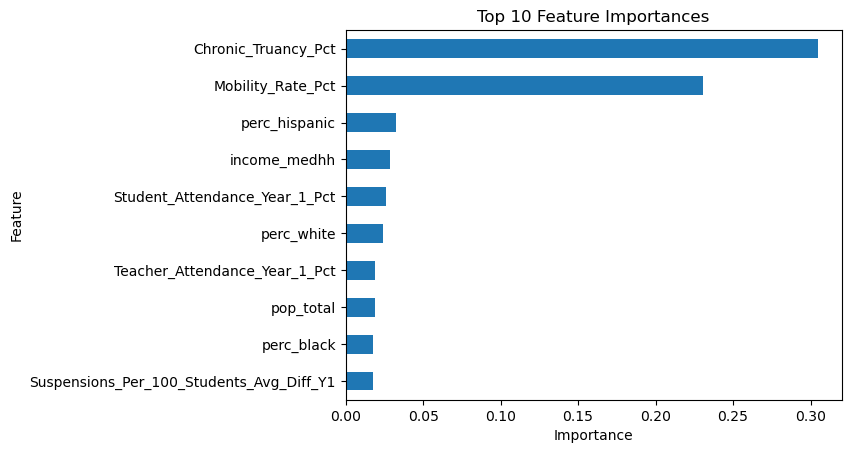

In [378]:
importance_df.head(10).plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()

### K Fold Cross Validation

In [382]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, make_scorer

# Independent variables
X = mydf[var_lst] 

# Fill numeric columns with the mean 
for i in var_lst[0:25]:
    
    X[i] = X[i].fillna(X[i].mean())

# Fill in cat columns with "missing"
for i in var_lst[26:]:
    if X[i].dtype.name == 'category':  # Check if the column is categorical
        # Add "missing" to the categories
        X[i] = X[i].cat.add_categories("missing")
    # Fill missing values with "missing"
    X[i] = X[i].fillna("missing")
#---------------------
# Define independent (X) and dependent (Y) variables

#X = sm.add_constant(X)  # Adds an intercept (constant term)...this is not automatic in statsmodel
Y = mydf['NWEA_Reading_Attainment_Grade_8_Pct']            # Dependent variable



# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['float64', 'int']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Preprocessing pipeline for numeric and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Define the model
model_rf2 = RandomForestRegressor(random_state=42)

# Combine preprocessing and model into a pipeline
pipeline = make_pipeline(preprocessor, model_rf2)

# K-Fold Cross-Validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Use RMSE as the scoring metric
rmse_scorer = make_scorer(mean_squared_error, squared=False)

# Perform K-Fold CV
cv_results = cross_val_score(pipeline, X, Y, cv=kf, scoring=rmse_scorer)

# Output results
print(f"Cross-validated RMSE for each fold: {cv_results}")
print(f"Mean RMSE: {cv_results.mean():.4f}")
print(f"Standard Deviation of RMSE: {cv_results.std():.4f}")


/opt/anaconda3/envs/ls_geo_env/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":
/opt/anaconda3/envs/ls_geo_env/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/envs/ls_geo_env/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

Cross-validated RMSE for each fold: [15.81403972 15.09673431 10.79945959 14.28204497 14.86279543]
Mean RMSE: 14.1710
Standard Deviation of RMSE: 1.7558


In [383]:
np.std(Y)

19.445684377758298

### <font color='orange'>Thoughts</font>

* The majority of our models yield an RMSE around 15. This means that the error of a prediction is generally 15 units (percentage points, since our target variable is a percentage... a value between 0 and 100) off. The standard deviation of our target is about 19, which means that the model is performing pretty good (the error is less than sd)
* The top contributing features to the model, according rf importance are:
                         Chronic_Truancy_Pct    0.304829
16                         Mobility_Rate_Pct    0.230291
3                              perc_hispanic    0.032326
5                               income_medhh    0.028937
12             Student_Attendance_Year_1_Pct    0.026181
1                                 perc_white    0.023936
  These are interesting, where truancy can def point to some home life or discipline/committment issues, which could affect attainment. I'm not sure what mobility rate measures...should look it up for some domain knowledge context.
* according to our linear regression output(where features were selected using lasso), the variables below were statistically significant
  stat sig vars: community_AUBURN GRESHAM (had a positive model coefficient), 
    (these others had a negative model coefficient) community_ENGLEWOOD, Misconducts_To_Suspensions_Year_1_Pct, School_Survey_Safety_WEAK, community_AUSTIN, School_Survey_Safety_VERY WEAK, Mobility_Rate_Pct, Chronic_Truancy_Pct
* the coefficient outputs from using the lasso model give another view of feature importance, and it somewhat aligns with the rf narrative. Be sure to use these coefficient outputs in the write up because they show strong neg and positive contributing features

NEXT STEPS:
- Feature importance using random forest
- sampling methods, maybe cross-validation to test on other samples of data to make sure results are statistically sound
- Go through analysis and do a write up on
  - the important factors to reading attainment
  - interesting analysis, even if wasn't reflected in model
  - where analytics and model agreed
  - how analysis/modeling could be extended in future (maybe adding more years of data)
- Go through notebook and make aesthetic updates to visualizations
- Create a cover/executive summary for portfolio 